<a href="https://colab.research.google.com/github/pawan070bct27/Data_Analysis_Updated/blob/main/Data_Month2_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#IMPORTING NECESSARY LIBRARIES




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import matplotlib
import pylab as pl
warnings.filterwarnings("ignore")

#LOADING THE DATASET

In [ ]:
df = pd.read_csv('Project Data_ Month 2 - raw_data.csv',parse_dates=['date'])
df

,date,device,creative_id,ad_unit_id,publisher_split,impressions,referrals,conversions
0,2017-12-01,Desktop,12,1,0.17,21,1,0
1,2017-12-01,Desktop,55,1,0.10,13,0,0
2,2017-12-01,Desktop,54,1,3.41,426,13,0
3,2017-12-01,Desktop,10,1,3.01,376,19,0
4,2017-12-01,Desktop,13,1,0.17,21,1,0
...,...,...,...,...,...,...,...,...
136919,2017-12-31,Other,40,Organic,0.00,0,0,0
136920,2017-12-31,Tablet,10,Organic,0.00,9,0,0
136921,2017-12-31,Tablet,23,Organic,0.00,8,0,0
136922,2017-12-31,Tablet,24,Organic,0.00,103,0,0


#Describing the statistical property of each column of dataset




In [ ]:
df.describe()

,creative_id,publisher_split,impressions,referrals,conversions
count,136924.000000,136924.000000,136924.000000,136924.000000,136924.000000
mean,21.400675,0.361959,266.120833,3.120446,0.009261
std,16.203013,3.038618,1869.762231,19.657209,0.124204
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,3.000000,0.000000,0.000000
50%,16.000000,0.020000,14.000000,0.000000,0.000000
75%,24.000000,0.090000,75.000000,1.000000,0.000000
max,58.000000,372.540000,186268.000000,1406.000000,12.000000


# More information on columns dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136924 entries, 0 to 136923
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             136924 non-null  datetime64[ns]
 1   device           136924 non-null  object        
 2   creative_id      136924 non-null  int64         
 3   ad_unit_id       136924 non-null  object        
 4   publisher_split  136924 non-null  float64       
 5   impressions      136924 non-null  int64         
 6   referrals        136924 non-null  int64         
 7   conversions      136924 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 8.4+ MB


# Finding the correlation relationship between each columns.

In [ ]:
corr_relation = df.corr()
corr_relation

,creative_id,publisher_split,impressions,referrals,conversions
creative_id,1.000000,0.004421,0.009512,0.007440,-0.001797
publisher_split,0.004421,1.000000,0.853442,0.675996,0.569598
impressions,0.009512,0.853442,1.000000,0.764240,0.490776
referrals,0.007440,0.675996,0.764240,1.000000,0.533397
conversions,-0.001797,0.569598,0.490776,0.533397,1.000000


#Let's visualize the correlation between each columns.

([<matplotlib.axis.YTick at 0x7fcce7e79240>,
 [Text(0, 0, 'creative_id'),
  Text(0, 0, 'publisher_split'),
  Text(0, 0, 'impressions'),
  Text(0, 0, 'referrals'),
  Text(0, 0, 'conversions')])

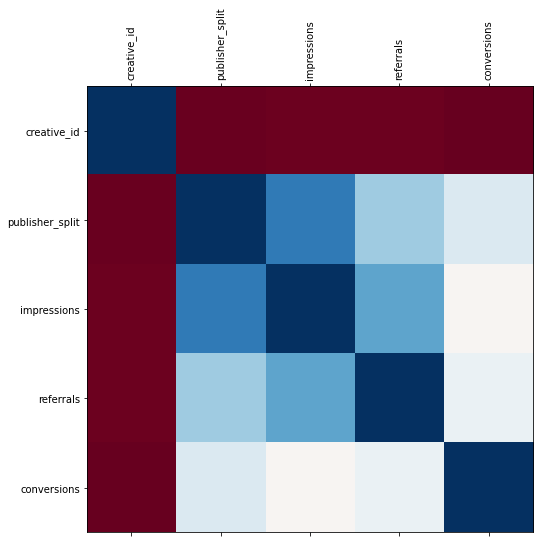

In [ ]:
# visualization
fig = plt.figure(figsize=(8,8))
plt.matshow(corr_relation, cmap = 'RdBu',fignum= fig.number)
plt.xticks(range(len(corr_relation.columns)), corr_relation.columns, rotation = 'vertical')
plt.yticks(range(len(corr_relation.columns)), corr_relation.columns)

In the figure above Dark blue represents the highest correlation and dark red represents the lowest correlation.
From the above figure we can make following observation:

* Creative id and conversion have very weak correlation. That is when the creative id is increasing conversion is very slowly increasing or not increasing at all or vice versa. This can affect the revenue of company. Let's figure out what exactly is happenning below. 



#Comparison of impressions, referrals and conversions with respect to the device type.

     Device  Action Type  Frequency  log(Frequency)
0   Desktop  conversions        626        2.796574
1   Desktop  impressions   10772633        7.032322
2   Desktop    referrals     118677        5.074367
3    Mobile  conversions        429        2.632457
4    Mobile  impressions   17762691        7.249509
5    Mobile    referrals     199237        5.299370
6    Tablet  conversions        211        2.324282
7    Tablet  impressions    7902747        6.897778
8    Tablet    referrals     109280        5.038541
9     Other  conversions          2        0.301030
10    Other  impressions        258        2.411620
11    Other    referrals         70        1.845098


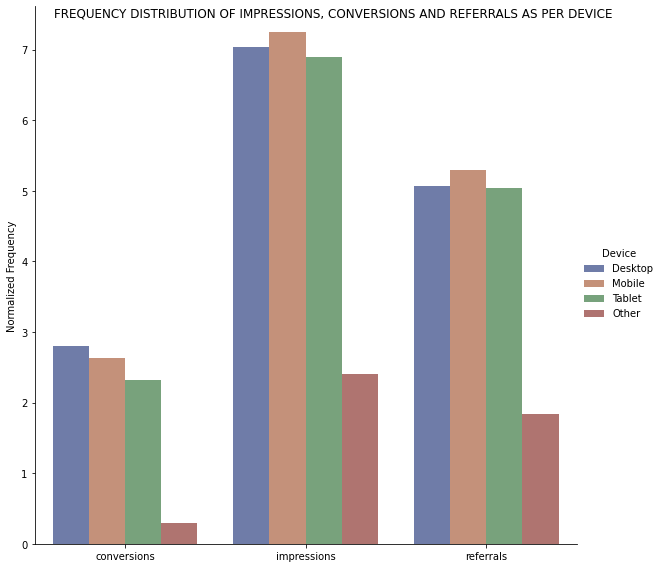

In [ ]:
# Creating a new data table including device type and frquency of Conversions, Impressions and Referrals
new_df_rows = []
for device in df['device'].unique():
  rows = df[df['device'] == device]
  total_conversions = rows['conversions'].sum()
  total_impressions = rows['impressions'].sum()
  total_referrals  = rows['referrals'].sum()
  new_df_rows.append([device,'conversions',total_conversions])
  new_df_rows.append([device,'impressions',total_impressions])
  new_df_rows.append([device,'referrals',total_referrals])

# Normalization of frequency, using logarithmic function, for clear visibility of graph 
new_df = pd.DataFrame(new_df_rows, columns=['Device', 'Action Type', 'Frequency'])
new_df['log(Frequency)'] = np.log10(new_df['Frequency'])
print(new_df)

#Visualization
with pd.option_context('mode.use_inf_as_na', True):
  g = sns.catplot(
      data=new_df, kind="bar",
      x="Action Type", y="log(Frequency)", hue="Device",
      ci="sd", palette="dark", alpha=.6, height=8
  )
  g.set_axis_labels("", "Normalized Frequency")
  g.fig.suptitle('FREQUENCY DISTRIBUTION OF IMPRESSIONS, CONVERSIONS AND REFERRALS AS PER DEVICE')

#Mobile:

* Referrals per impression = 5.3 / 7.2 = 0.73

* Conversion per impression = 3.5 / 7.2 = 0.48

* Conversions per referral = 3.5 / 5.3 = 0.66

#Desktop:

* Referrals per impression = 5 / 7 = 0.71

* Conversions per impression = 3.6 / 7 = 0.51

* Conversions per referral = 3.6 / 5 = 0.72

#Tablet:

* Referrals per impression = 5 / 6.8 = 0.73

* Conversions per impression = 2.4 / 6.8 = 0.35

* Conversions per referral = 2.4 / 5 = 0.48

#Other :

* Referrals per impression = 1.7 / 2.4 = 0.70

* Conversions per impression = 0.3 / 2.4 = 0.125

* Conversions per referral = 0.3 / 1.7 = 0.17


From the graph above we can infer following observations:


* Conversions to impressions ratio is high for Desktop device users. They contribute for biggest portion of revenue for the company.


* Conversions to impressions ratio is lowest for Other 
 devices users. They contribute for least portion of revenue for the company.


* Referrals to impressions ratio is high for Tablet device users and low for Other device users. That is the reach of ad to target users  are least for Other devices users and high for Tablet devices users.

* Conversions to referalls ratio is high for Desktop and least for Other devices. That is the most ad visitors from Other devices don't want what you are offering them. But, the ad visitors from the Desktop is liking the offering from ad.




#Recommendations:

1. Boost up the impressions on Desktop devices. Since, they they have highest contribution in the conversions of target audience. 

2. Focus on seeing the ad by target users for Other  device users. Ad unit might responsible for it.

3. Focus on offering made to the ad visitor for Other devices. Creative unit id might be responsible for it.


## Let's visualize the relationship between creative id and conversions for each device type.

#Firstly define a function that takes device type as an argument and returns a DataFrame containing necessary information.

In [ ]:
def conversion_vs_creative(device):
  df_conversion_vs_creative = []
  for creative_id in df['creative_id'].unique():
    rows = df[(df['creative_id'] == creative_id) & (df['device'] == device)]
    c = rows['conversions'].sum()
    df_conversion_vs_creative.append([creative_id,c])
  df_conversion_vs_creative = pd.DataFrame(df_conversion_vs_creative, columns=['creative_id', 'conversions'])
  df_conversion_vs_creative = df_conversion_vs_creative.sort_values(by=['creative_id'])
  df_conversion_vs_creative.plot(x = 'creative_id', y = 'conversions', kind ='bar', figsize = (20,8),rot = 0, title = 'Conversions Vs creative id when devices used  were: ' + str(device))
  plt.ylabel('Conversions') 
  return df_conversion_vs_creative

1. **Conversions Vs creative id when Desktop Devices were used**

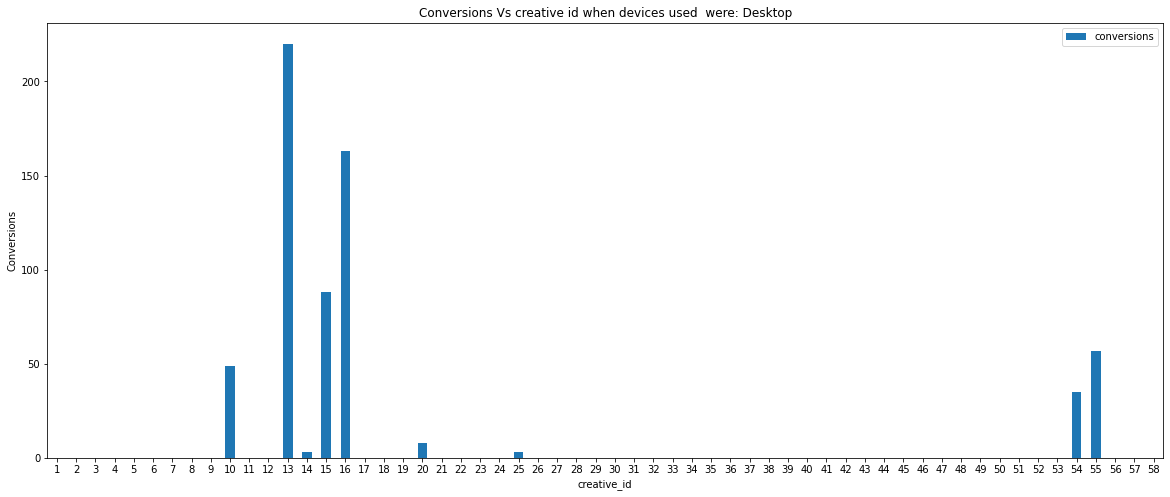

In [ ]:
desktop_obj_cvc = conversion_vs_creative('Desktop') #Function call

We can see that, for Desktop Devices, creative id's 10 , 13, 14, 15, 16, 20, 25, 54 and 55 only have contribution in conversions. Creative id 13 has highest number of conversions while creative id 14, 20 and 25 has very less number of conversions. I recommend not using or optimizing those creative id's which has very less number of conversions. Also, should not use the creative id's which have no conversions at all.



2.  **Conversions Vs creative id when Mobile Devices were used**




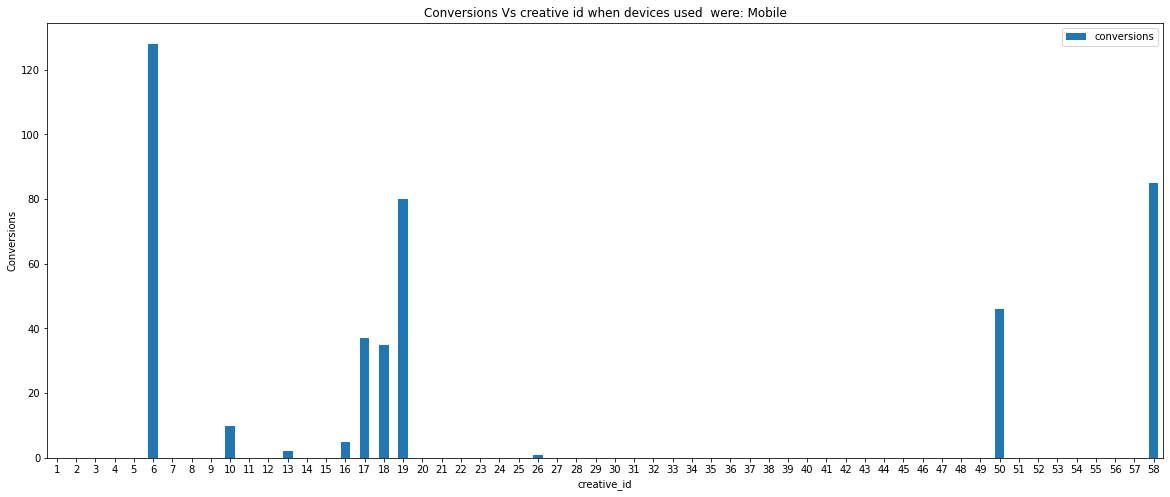

In [ ]:
Mobile_obj_cvc = conversion_vs_creative('Mobile') #Function call


We can see that, for Mobile Devices, creative id's 6, 10, 13, 16, 17, 18,19 and 50 only have contribution in conversions. Creative id 6 has highest number of conversions. I recommend using those creative id's and excluding others for reducing cost and maximizing the revenue of the company.I recommend not using or optimizing those creative id's which has very less number of conversions. Also, should not use the creative id's which have no conversions at all.


3.  **Conversions Vs creative id when Tablet Devices were used**

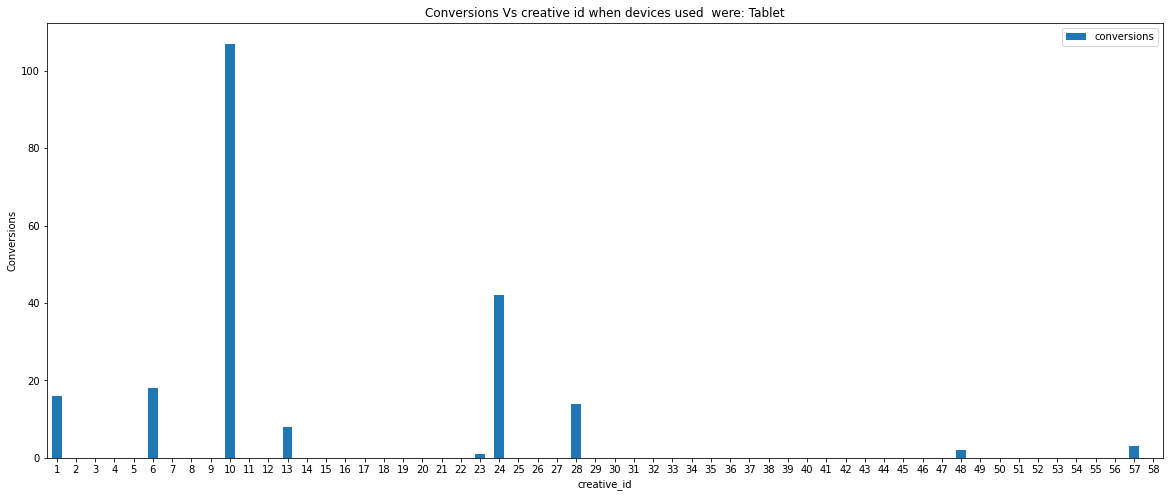

In [ ]:
Tablet_obj_cvc = conversion_vs_creative('Tablet') 

We can see that, for Tablet Devices, creative id's 1, 6, 10, 13, 24 and 28 only have contribution in conversions. Creative id 1 has highest number of conversions. Also, Creative id's 23, 48 and 57 has least amount of conversions. I recommend not using or optimizing those creative id's beacuase they are increasing the cost. I recommend not using or optimizing those creative id's which has very less number of conversions. Also, should not use the creative id's which have no conversions at all.




# Lets visualize a combine graph for conversions vs creative_id corresponding to the each device type.

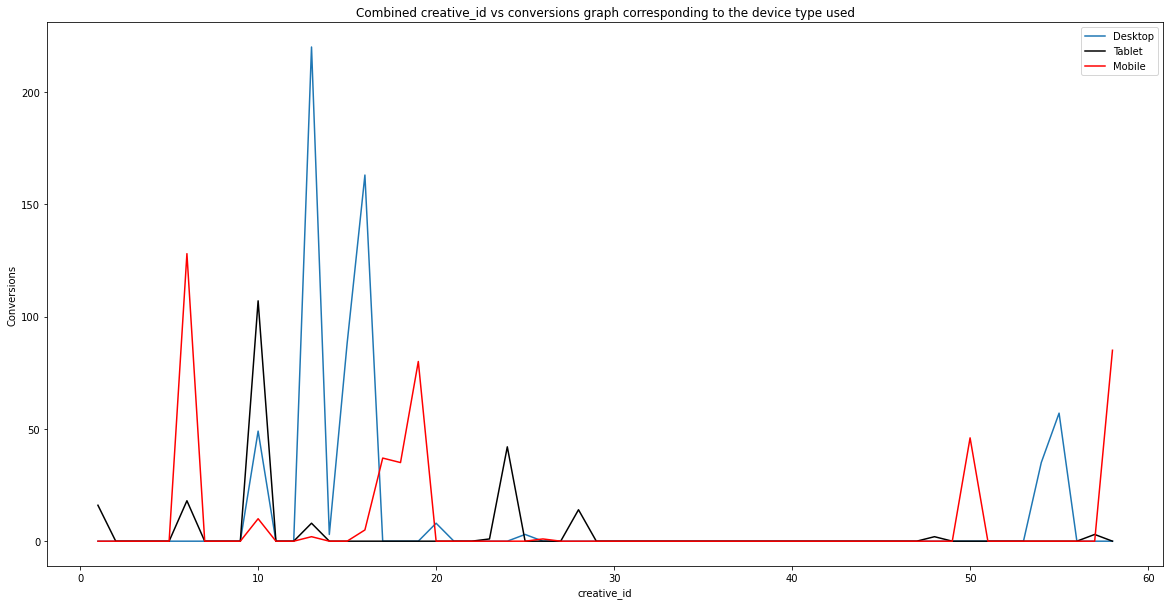

In [ ]:
# Visualization
plt.figure(figsize=(20,10))
plt.plot(desktop_obj_cvc['creative_id'], desktop_obj_cvc['conversions'] , label = 'Desktop')
plt.plot(Tablet_obj_cvc['creative_id'], Tablet_obj_cvc['conversions'] , label = 'Tablet', color ='black')
plt.plot(Mobile_obj_cvc['creative_id'], Mobile_obj_cvc['conversions'] , label = 'Mobile',color = 'red')
plt.title('Combined creative_id vs conversions graph corresponding to the device type used' )
plt.xlabel('creative_id')
plt.ylabel('Conversions')
plt.legend()

Note : *We can see that creative id 10 is very useful. It has conversions for all three devices.*

WE CAN USE THE ABOVE GRAPH IF WE NEED SIMULTANEOUS COMPARISON OF CREATIVE ID'S FOR EACH DEVICES WITH RESPECT TO NUMBER OF  CONVERSIONS.

#Let's visualize conversions vs ad_unit_id for each type of devices.

#Firstly define a function first that takes Type of device as argument and creates a new data frame.

In [ ]:
def Conversions_ad_unit_id(device):
  df_conversions_ad_unit_id = []
  for ad_unit_id in df['ad_unit_id'].unique():
    rows = df[(df['ad_unit_id'] == ad_unit_id) & (df['device'] == device)]
    c = rows['conversions'].sum()
    df_conversions_ad_unit_id.append([ad_unit_id,c])
  df_conversions_ad_unit_id = pd.DataFrame(df_conversions_ad_unit_id, columns=['ad_unit_id', 'conversions'])
  df_conversions_ad_unit_id = df_conversions_ad_unit_id[df_conversions_ad_unit_id.ad_unit_id != 'Organic']
  df_conversions_ad_unit_id = df_conversions_ad_unit_id.sort_values(by=['ad_unit_id'])
  plt.figure()
  df_conversions_ad_unit_id.plot(x = 'ad_unit_id', y = 'conversions', figsize = (20,8) ,title = 'Conversions Vs ad_unit_id when device type used were = '+str(device))
  plt.ylabel('Conversions')
  return df_conversions_ad_unit_id

 1. **Conversions vs ad_unit_id when Desktop devices were used**




<Figure size 432x288 with 0 Axes>

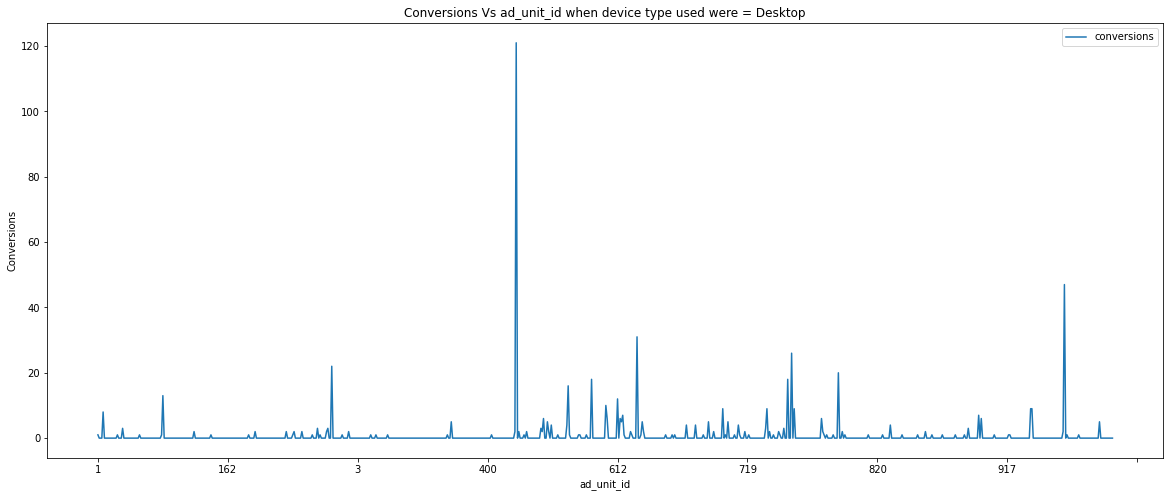

In [ ]:
Desktop_conversions_vs_ad_obj = Conversions_ad_unit_id('Desktop') #Function call

**Let's split the ad_unit_id into two parts visualize more clearly below:**

*Note: For the more precise view we can either view the graph in a larger screen or split ad_unit_id in more number of parts.*


**Let's define another function that plots graph for ad_unit_id more than 600:**

In [ ]:
def more_than_600_conv_ad(device_conversions_vs_ad_obj):
    # Creating a new data frame
    device_conversions_vs_ad_obj= device_conversions_vs_ad_obj[(device_conversions_vs_ad_obj['ad_unit_id'].astype(int)> 600)]
    # Visualization
    plt.figure()
    device_conversions_vs_ad_obj.plot(x = 'ad_unit_id', y = 'conversions', figsize = (20,10), title = 'COnversions Vs ad_unit_id(more than 600)')
    plt.ylabel('Conversions')

**Let's define another function that plots graph for ad_unit_id less than 600**

In [ ]:
def less_than_600_conv_ad(device_conversions_vs_ad_obj):
    # Creating a new data frame
    device_conversions_vs_ad_obj= device_conversions_vs_ad_obj[(device_conversions_vs_ad_obj['ad_unit_id'].astype(int)< 600)]
    # Visualization
    plt.figure()
    device_conversions_vs_ad_obj.plot(x = 'ad_unit_id', y = 'conversions', figsize = (20,10), title = 'COnversions Vs ad_unit_id(less than 600)')
    plt.ylabel('Conversions')

1.1 **When ad_unit_id is more than 600.**

<Figure size 432x288 with 0 Axes>

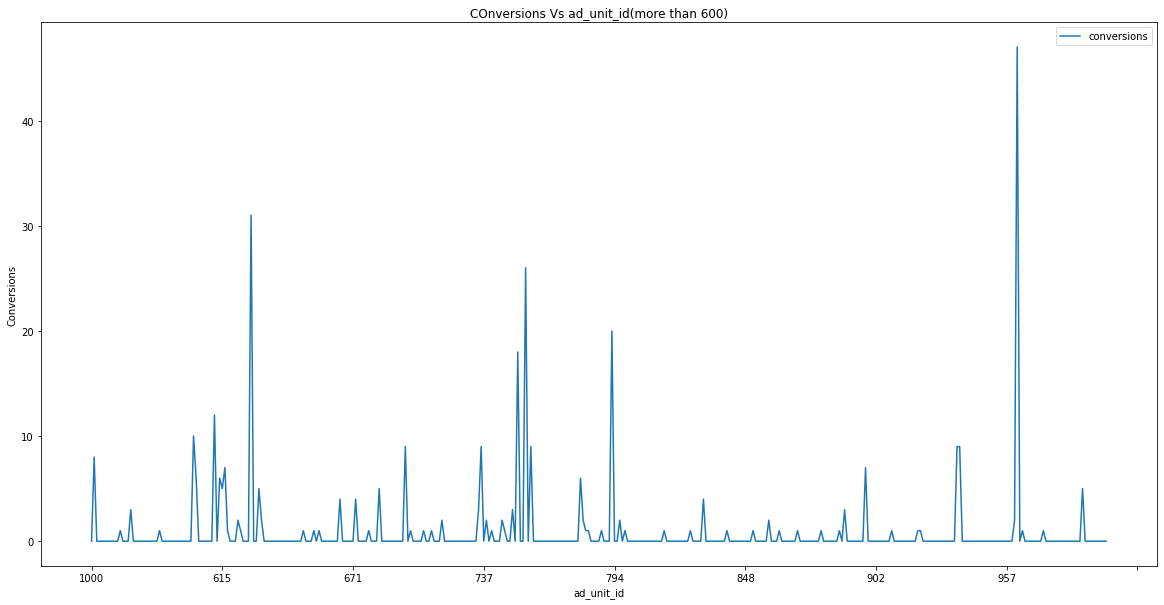

In [ ]:
more_than_600_conv_ad(Desktop_conversions_vs_ad_obj)

We can see that ad unit id around 614, 737, 794, 967, 671 have large contribution in conversions for Mobile Devices users. I recommend using those ad_unit_id's to boost up the revenue. I also recommend to filter the ad_unit_id which doesn't have any contribution at all, from the above graph. 

1.2 **When ad_unit_id is less than 600**

<Figure size 432x288 with 0 Axes>

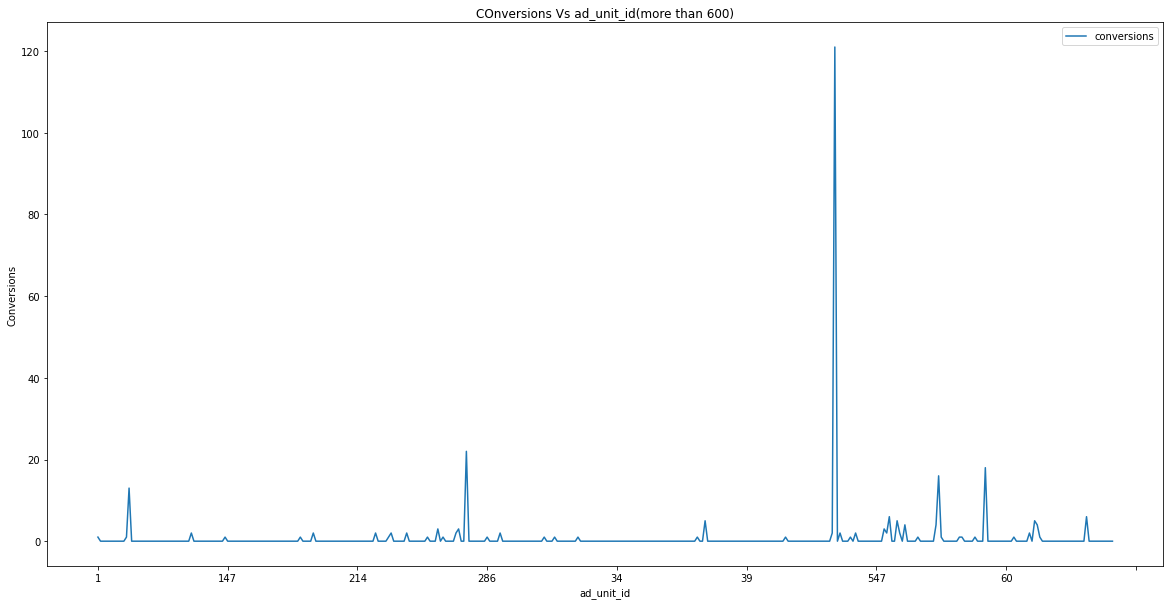

In [ ]:
less_than_600_conv_ad(Desktop_conversions_vs_ad_obj)

We can see that ad unit id around 286, 547 have large contribution in conversions for Mobile Devices users. I recommend using those ad_unit_id's to boost up the revenue. I also recommend to filter the ad_unit_id which doesn't have any contribution at all, from the above graph. 

 2. **Conversions vs ad_unit_id when Mobile devices were used**


<Figure size 432x288 with 0 Axes>

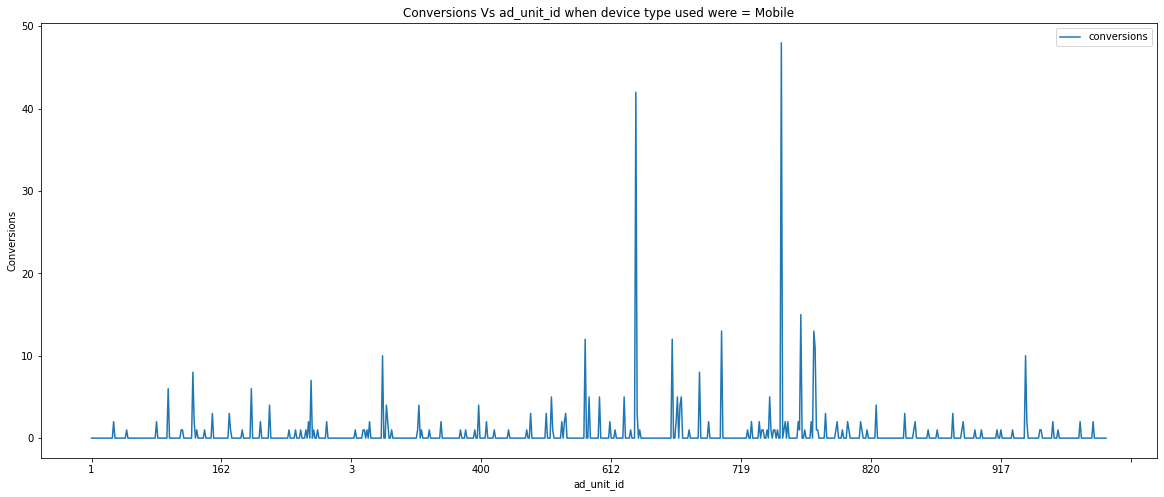

In [ ]:
Mobile_conversions_vs_ad_obj = Conversions_ad_unit_id('Mobile') #Function call

**Let's visualize more clearly below.**


2.1 **When the ad unit id is more than 600**

<Figure size 432x288 with 0 Axes>

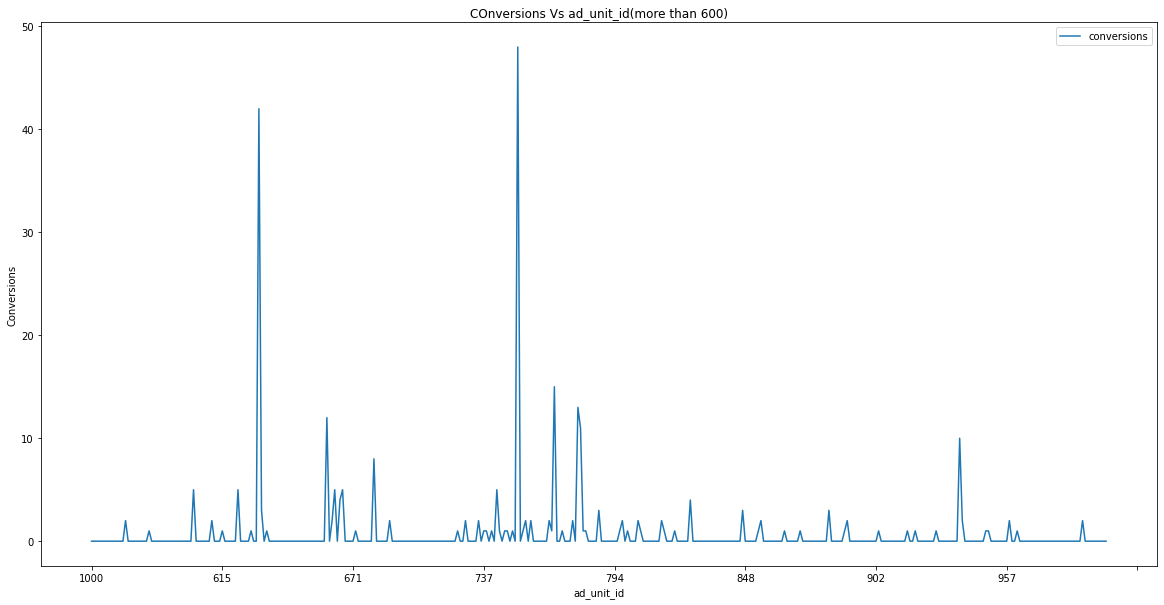

In [ ]:
more_than_600_conv_ad(Mobile_conversions_vs_ad_obj)

We can see that ad unit id around 615 and between ( 737, 794 ), 848, 935 have large contribution in conversions for Mobile Devices users. I recommend using those ad_unit_id's to boost up the revenue. I also recommend to filter the ad_unit_id which don't have any contribution at all from the above graph. 

2.2 **When ad_unit_id is less than 600**

<Figure size 432x288 with 0 Axes>

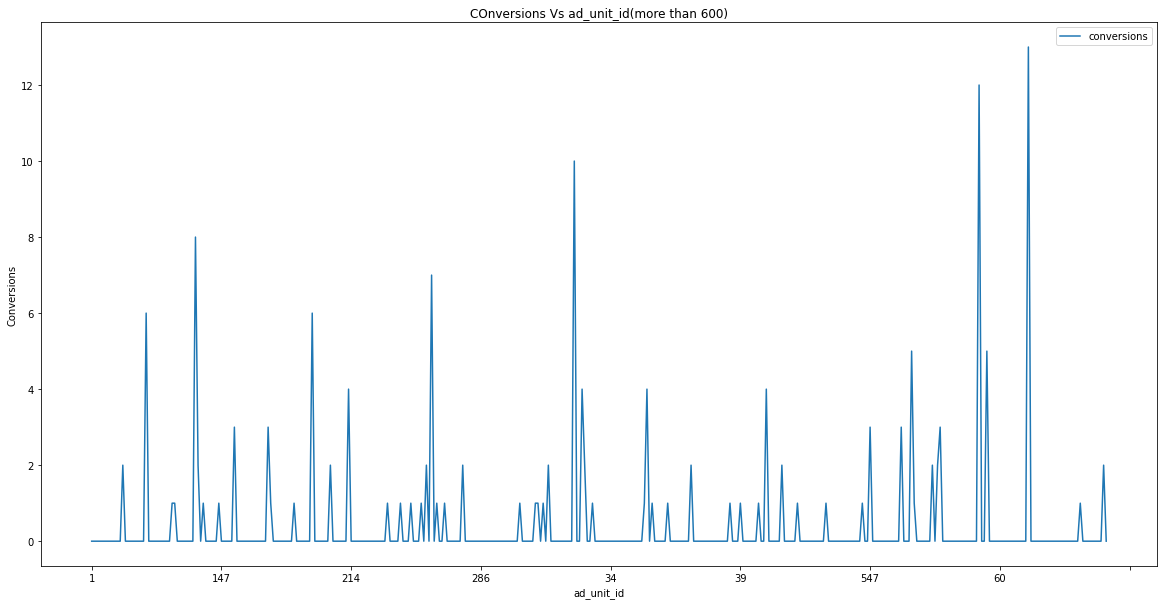

In [ ]:
less_than_600_conv_ad(Mobile_conversions_vs_ad_obj)

We can see that ad unit id around 147, (220,280), (39,247 have more contribution in conversions for Mobile Devices users. I recommend using those ad_unit_id's to boost up the revenue. I also recommend to filter the ad_unit_id which don't have any contribution at all from the above graph.



 3. **Conversions vs ad_unit_id when Tablet devices were used**


<Figure size 432x288 with 0 Axes>

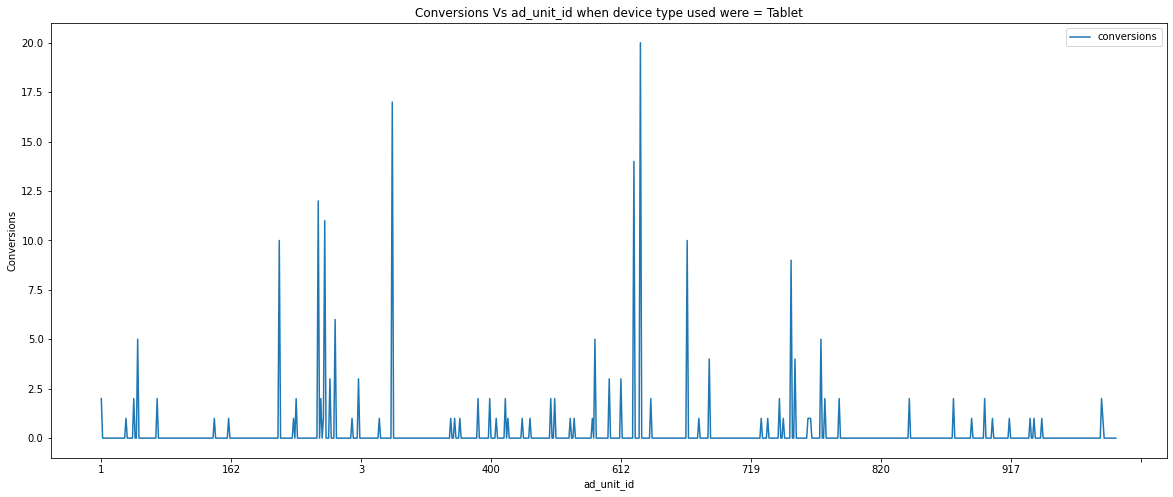

In [ ]:
Tablet_conversions_vs_ad_obj = Conversions_ad_unit_id('Tablet') #Function call

**Let's split ad_unit_id into two parts and visualize more clearly below:**


3.1 **When ad_unit_id is more than 600**

<Figure size 432x288 with 0 Axes>

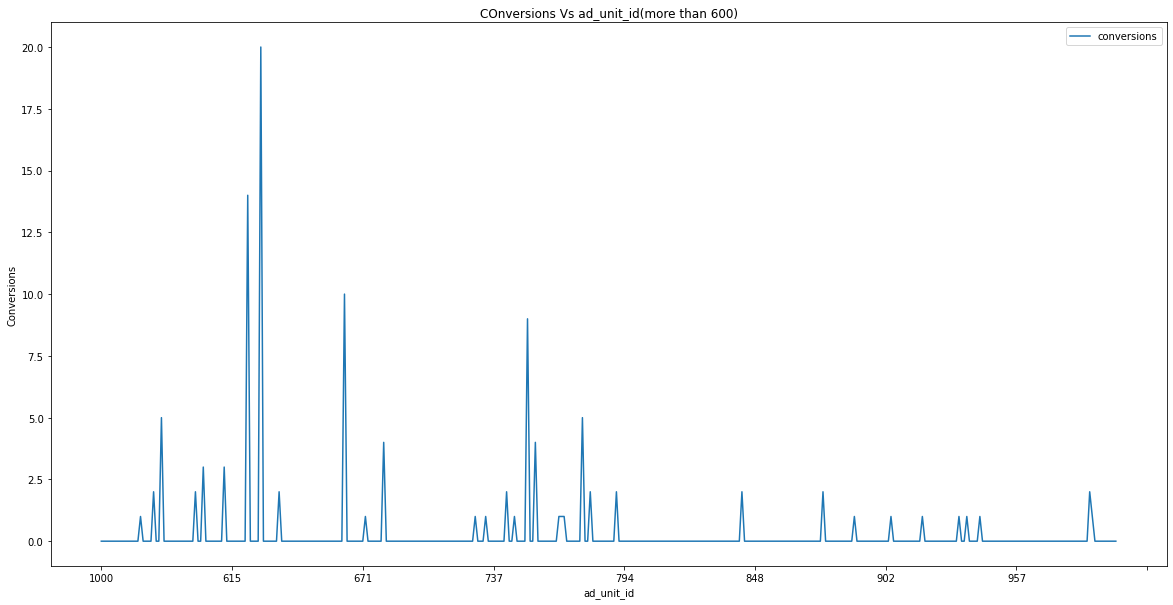

In [ ]:
more_than_600_conv_ad(Tablet_conversions_vs_ad_obj)

We can see that ad unit id around 614, 671, 737 to 794 have more contribution in conversions for Tablet Devices users. I recommend using those ad_unit_id's to boost up the revenue. I also recommend to filter the ad_unit_id which don't have any contribution at all from the above graph.

3.2 **When ad_unit_id is less than 600**

<Figure size 432x288 with 0 Axes>

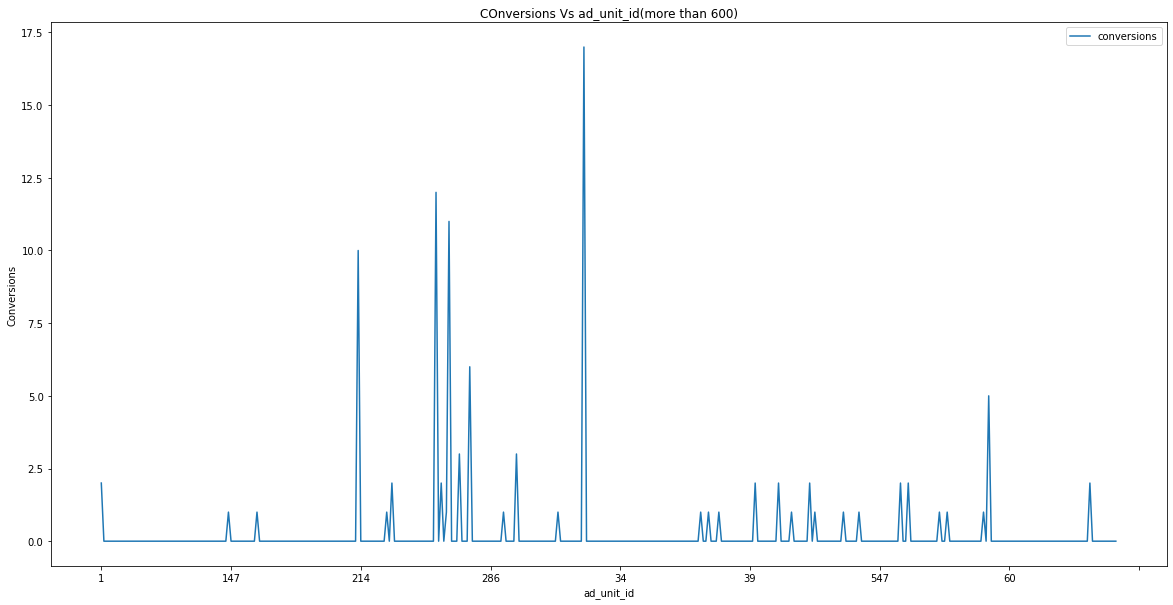

In [ ]:
less_than_600_conv_ad(Tablet_conversions_vs_ad_obj)

We can see that ad unit id around 280, 39 have more contribution in conversions for Tablet Devices users. I recommend using those ad_unit_id's to boost up the revenue. I also recommend to filter the ad_unit_id which don't have any contribution at all from the above graph.

#Let's visualize ad_unit_id and referrals according to the device type used.

#Firstly define a function that takes device type as an argument and returns a DataFrame containing necessary information.

In [ ]:
def Referrals_ad_unit_id(device):
  df_Referrals_ad_unit_id = []
  for ad_unit_id in df['ad_unit_id'].unique():
    rows = df[(df['ad_unit_id'] == ad_unit_id) & (df['device'] == device)]
    c = rows['referrals'].sum()
    df_Referrals_ad_unit_id.append([ad_unit_id,c])
  df_Referrals_ad_unit_id = pd.DataFrame(df_Referrals_ad_unit_id, columns=['ad_unit_id', 'Referrals'])
  df_Referrals_ad_unit_id = df_Referrals_ad_unit_id[df_Referrals_ad_unit_id.ad_unit_id != 'Organic']
  df_Referrals_ad_unit_id = df_Referrals_ad_unit_id.sort_values(by=['ad_unit_id'])
 # Visualization
  plt.figure()
  df_Referrals_ad_unit_id.plot(x = 'ad_unit_id', y = 'Referrals', figsize = (20,10), title = 'Referrals Vs ad_unit_id(more than 600) when devices used were :'+str(device))
  plt.ylabel('Referrals')
  return df_Referrals_ad_unit_id

**Let's define another function that plots graph for ad_unit_id more than 600:**

In [ ]:
def more_than_600_ref_ad(device_conversions_vs_ref_obj):
    # Creating a new data frame
    device_conversions_vs_ref_obj= device_conversions_vs_ref_obj[(device_conversions_vs_ref_obj['ad_unit_id'].astype(int)> 600)]
    # Visualization
    plt.figure()
    device_conversions_vs_ref_obj.plot(x = 'ad_unit_id', y = 'Referrals', figsize = (20,10), title = 'Referrals Vs ad_unit_id(more than 600)')
    plt.ylabel('Conversions')

**Let's define another function that plots graph for ad_unit_id less than 600**

In [ ]:
def less_than_600_ref_ad(device_conversions_vs_ref_obj):
    # Creating a new data frame
    device_conversions_vs_ref_obj= device_conversions_vs_ref_obj[(device_conversions_vs_ref_obj['ad_unit_id'].astype(int)< 600)]
    # Visualization
    plt.figure()
    device_conversions_vs_ref_obj.plot(x = 'ad_unit_id', y = 'Referrals', figsize = (20,10), title = 'Referrals Vs ad_unit_id(less than 600)')
    plt.ylabel('Conversions')

 1. **Referrals vs ad_unit_id when Desktop devices were used**


<Figure size 432x288 with 0 Axes>

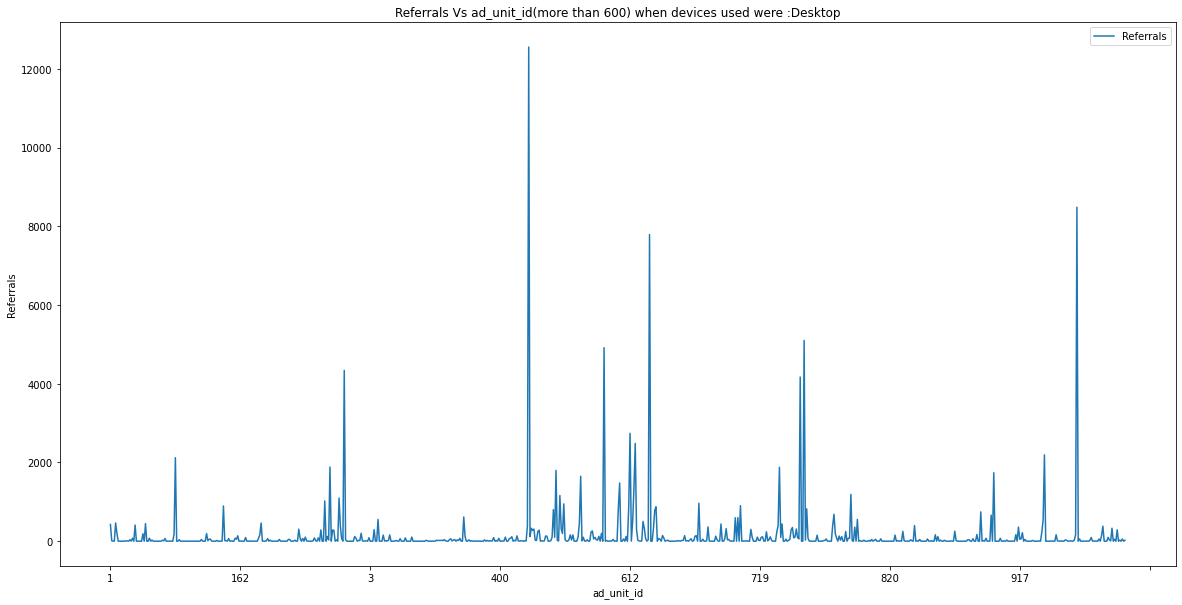

In [ ]:
Referrals_ad_unit_Desktop_obj = Referrals_ad_unit_id('Desktop')

**Let's visualize more clearly below splitting ad_unit_id into two parts:**

1.1 **When ad_unit_id is more than 600**

<Figure size 432x288 with 0 Axes>

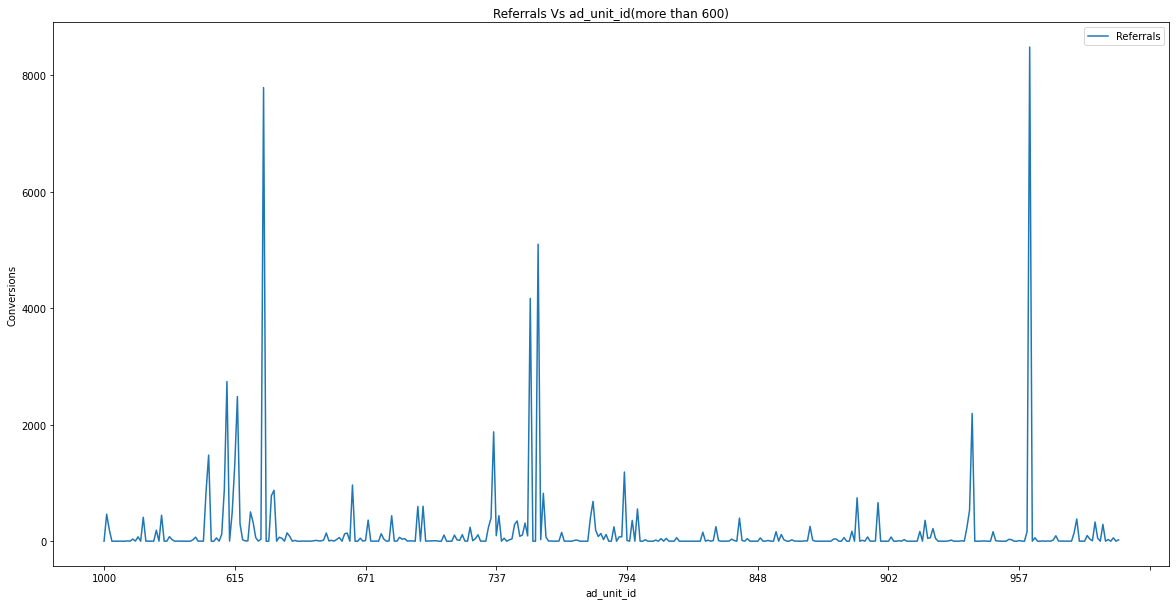

In [ ]:
more_than_600_ref_ad(Referrals_ad_unit_Desktop_obj)

We can see that ad unit id around 614, 671, 737, 794, 957 have large contribution in referrals for Desktop Devices users. I recommend using those ad_unit_id's to boost up the 
referral rate. I also recommend to filter the ad_unit_id which don't have any contribution in referrals at all from the above graph. 

1.2 **When ad_unit_id is less than 600**

<Figure size 432x288 with 0 Axes>

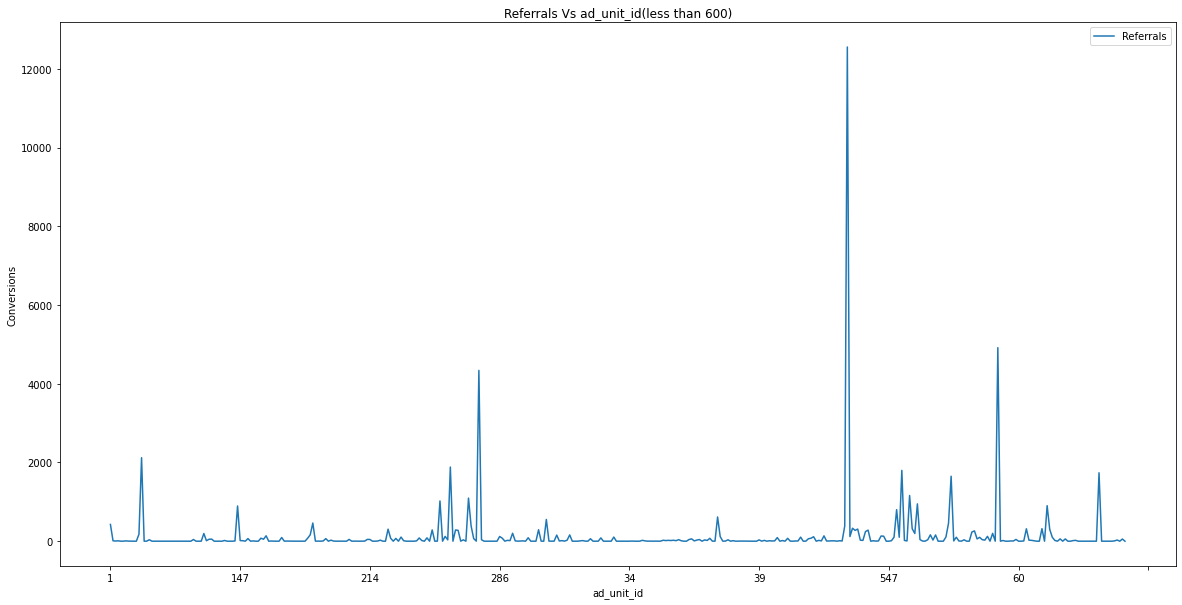

In [ ]:
less_than_600_ref_ad(Referrals_ad_unit_Desktop_obj)

We can see that ad unit id around 270, 547, 60 to have large contribution in referrals for Desktop Devices users. I recommend using those ad_unit_id's to boost up the 
referral rate. I also recommend to filter the ad_unit_id which don't have any contribution in referrals at all from the above graph. 

 2. **Referrals vs ad_unit_id when Mobile devices were used**


<Figure size 432x288 with 0 Axes>

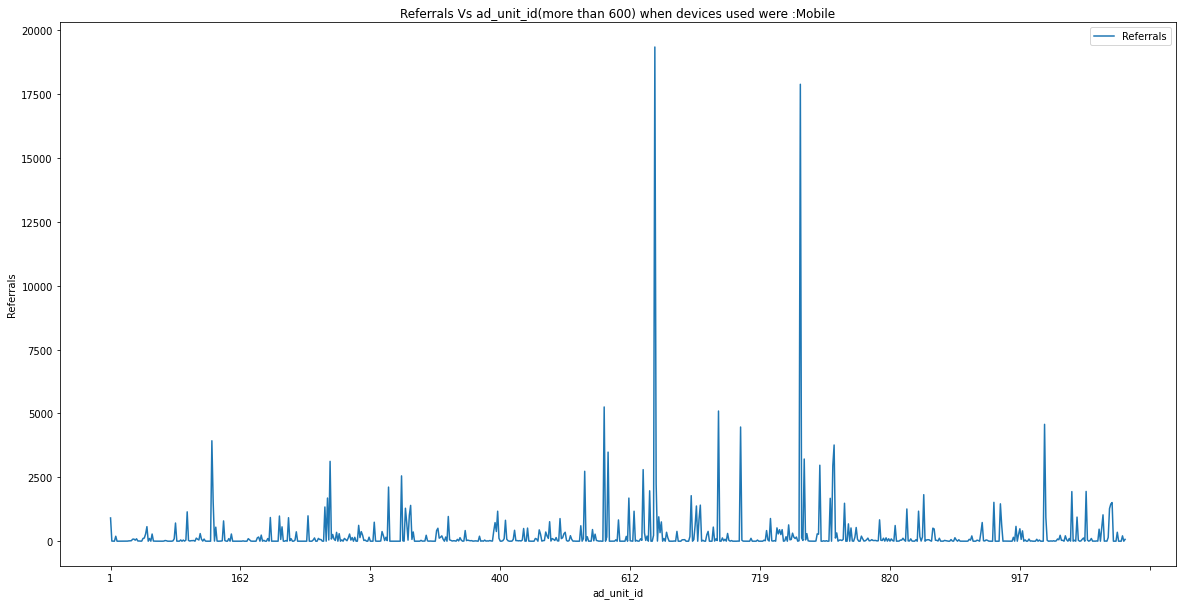

In [ ]:
Referrals_ad_unit_Mobile_obj = Referrals_ad_unit_id('Mobile')

**Let's split the ad_unit_id into two parts and visualize more clearly below:**

2.1 **When ad_unit_id is more than 600**

<Figure size 432x288 with 0 Axes>

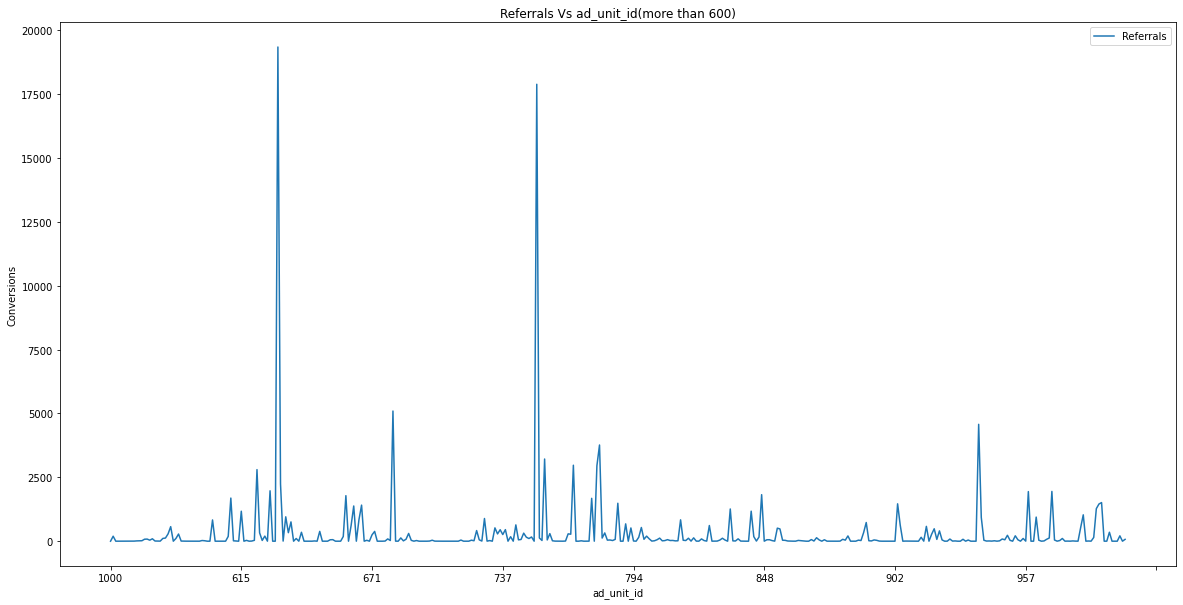

In [ ]:
more_than_600_ref_ad(Referrals_ad_unit_Mobile_obj)

We can see that ad unit id around 615, 737 to 794, 848 have large contribution in referrals for Mobile Devices users. I recommend using those ad_unit_id's to boost up the 
referral rate. I also recommend to filter the ad_unit_id which don't have any contribution in referrals at all from the above graph. 

2.2 **When ad_unit_id is less than 600**

<Figure size 432x288 with 0 Axes>

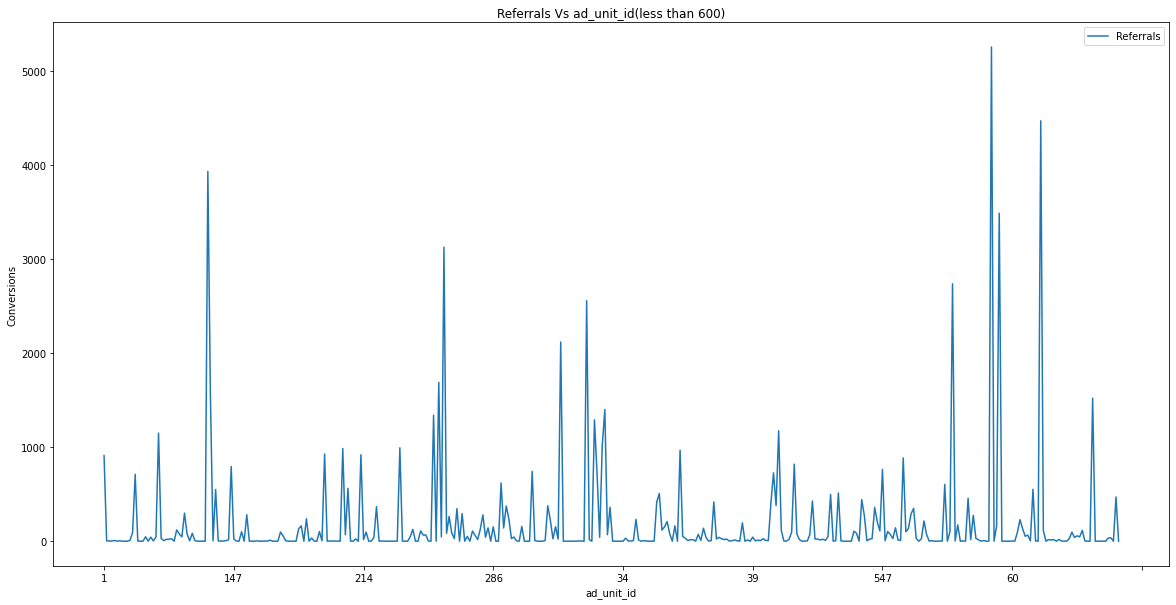

In [ ]:
less_than_600_ref_ad(Referrals_ad_unit_Mobile_obj)

We can see that ad unit id around 140, 214, 286, 547, 60 have large contribution in referrals for Mobile Devices users. I recommend using those ad_unit_id's to boost up the 
referral rate. I also recommend to filter the ad_unit_id which don't have any contribution in referrals at all from the above graph. 

 3. **Referrals vs ad_unit_id when Tablet devices were used**


<Figure size 432x288 with 0 Axes>

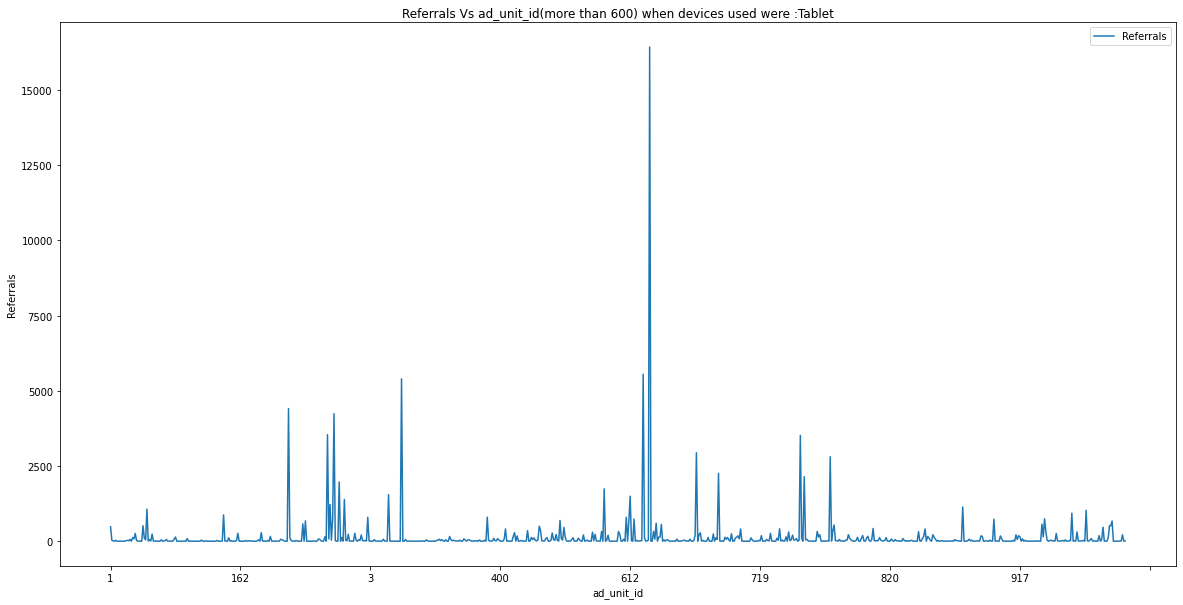

In [ ]:
Referrals_ad_unit_Tablet_obj = Referrals_ad_unit_id('Tablet')

**Let's split the ad_unit_id into two parts and visualize more clearly**

3.1 **When ad_unit_id is more than 600**

<Figure size 432x288 with 0 Axes>

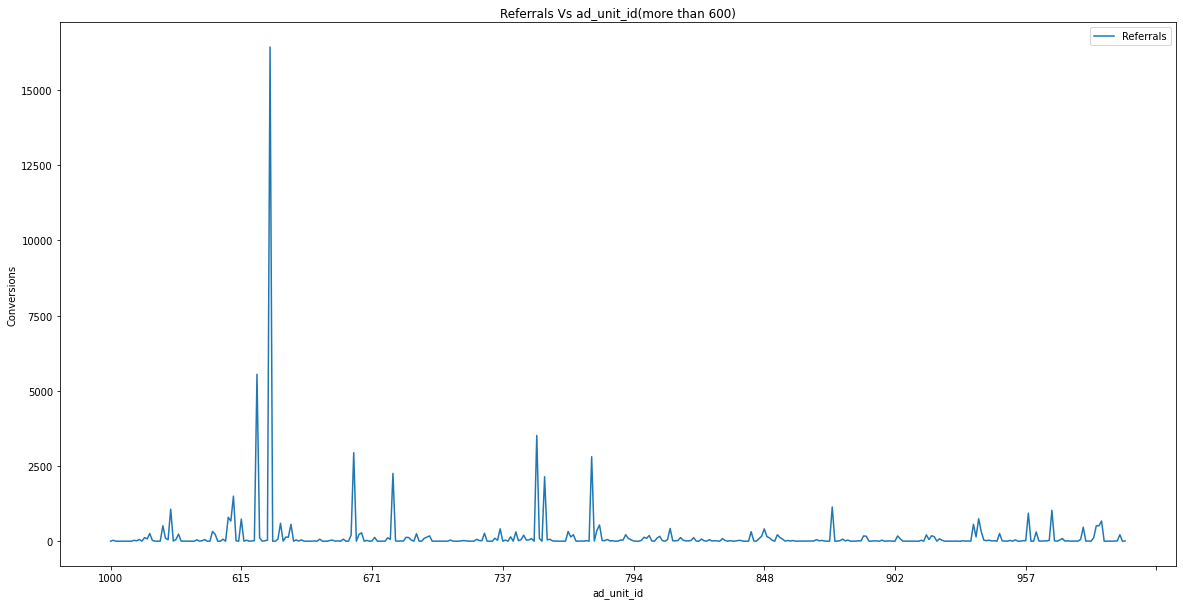

In [ ]:
more_than_600_ref_ad(Referrals_ad_unit_Tablet_obj)

We can see that ad unit id around 615, 670, 750 have large contribution in referrals for Tablet Devices users. I recommend using those ad_unit_id's to boost up the 
referral rate. I also recommend to filter the ad_unit_id which don't have any contribution in referrals at all from the above graph. 

3.2 **When ad_unit_id is less than 600**

<Figure size 432x288 with 0 Axes>

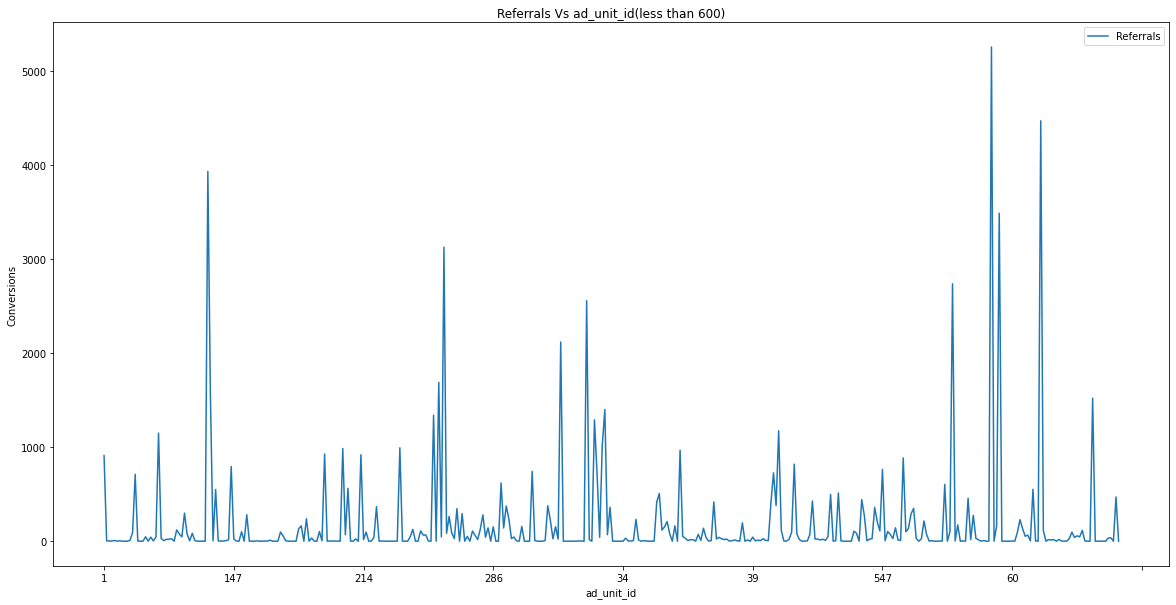

In [ ]:
less_than_600_ref_ad(Referrals_ad_unit_Mobile_obj)

We can see that ad unit id around 286, 547, 60 have large contribution in referrals for Tablet Devices users. I recommend using those ad_unit_id's to boost up the 
referral rate. I also recommend to filter the ad_unit_id which don't have any contribution in referrals at all from the above graph. 

# Let's visualize Conversions, Referrals and Impressions according to the date.

         Date  Action Type  Frequency  log(Frequency)
0  2017-12-01  conversions         35        1.544068
1  2017-12-01  impressions    1374205        6.138052
2  2017-12-01    referrals      16379        4.214287
3  2017-12-02  conversions         24        1.380211
4  2017-12-02  impressions     908950        5.958540
..        ...          ...        ...             ...
88 2017-12-30  impressions     925035        5.966158
89 2017-12-30    referrals      12337        4.091210
90 2017-12-31  conversions         42        1.623249
91 2017-12-31  impressions     989302        5.995329
92 2017-12-31    referrals      11752        4.070112

[93 rows x 4 columns]


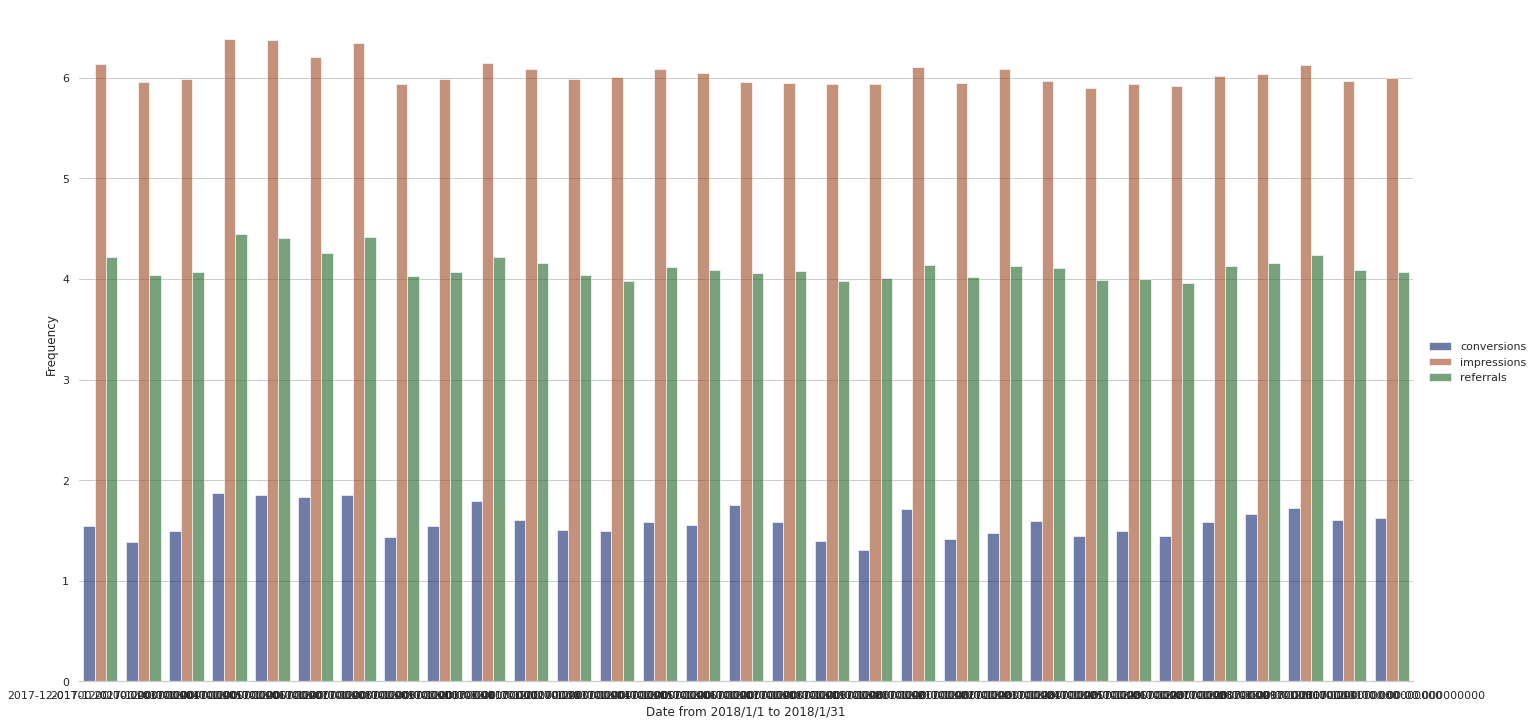

In [ ]:
# Creation of new DataFrame
new_df_rows1 = []
for date in df['date'].unique():
  rows = df[df['date'] == date]
  total_conversions = rows['conversions'].sum()
  total_impressions = rows['impressions'].sum()
  total_referrals  = rows['referrals'].sum()
  new_df_rows1.append([date,'conversions',total_conversions])
  new_df_rows1.append([date,'impressions',total_impressions])
  new_df_rows1.append([date,'referrals',total_referrals])

# Normalization of frequency, using logarithmic function, for clear visibility of graph 
new_df1 = pd.DataFrame(new_df_rows1, columns=['Date', 'Action Type', 'Frequency'])
new_df1['log(Frequency)'] = np.log10(new_df1['Frequency'])
print(new_df1)

# Visualization
import seaborn as sns
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=new_df1, kind="bar",
    x="Date", y="log(Frequency)", hue="Action Type",
    ci="sd", palette="dark", alpha=.6, height=10, aspect = 2
)
g.despine(left=True)
g.set_axis_labels("Date from 2018/1/1 to 2018/1/31", "Frequency")
g.legend.set_title("")

WE CAN USE THE ABOVE GRAPH FOR VISUALIZATION OF NUMBER OF CONVERSIONS, IMPRESSIONS AND REFERRALS WITH RESPECT TO EACH DATES.

#SET OF METRICS

#CONVERSION RATE PER REFERRAL(CRR)



How many ad visitors were actually converted?

**Conversion rate per referral(CRR) = (Total Conversions / Total referrals) * 100%**

In [ ]:
CRR = (df['conversions'].sum() / df['referrals'].sum()*100)
print('The conversion rate  = ',CRR, '%')

The conversion rate  =  0.2967720191731576 %


Out of 1000 ad visitors,  about 3 of them were converted.

#CONVERSION RATE PER IMPRESSION(CVR)



HOW MANY IMPRESSIONS WERE ACTUALLY CONVERTED?

**Conversion rate per 1000 impressions ( CVRI ) = ( Total Conversions / Total impressions )  * 1000**




In [ ]:
CVRI = (df['conversions'].sum() / df['impressions'].sum())*1000
print('Conversion rate per 1000 impressions is = ', CVRI)

Conversion rate per 1000 impressions is =  0.03479852218250733


#REFERRAL RATE PER IMPRESSION (RRI)

HOW MANY IMPRESSIONS WERE CLICKED AND THE AD WAS VISITED BY THE USER?


**Referral rate per 1000 impressions ( RRI ) = ( Total referrals / impressions ) * 1000**

In [ ]:
RRI = (df['referrals'].sum() / df['impressions'].sum())*1000
print('Referrals rate  per 1000 impressions  = ', RRI)

Referrals rate  per 1000 impressions  =  11.725674906771932


#COST PER MILE (CPM)

How much Company is paying publisher per 1,000 impressions?


**Cost Per Mile (CPM)  = ( Total publisher split / Total impressions ) * 1000**

In [ ]:
CPM = (df['publisher_split'] * 1000).divide(df['impressions'])
with pd.option_context('mode.use_inf_as_na', True):
  print('The average value of money Company is paying publisher per 1000 impressions is = $',CPM.dropna().mean())

The average value of money Company is paying publisher per 1000 impressions is = $ 1.315738011743918


The average value of money Company is paying publisher per 1000 impressions is = $ 1.315738011743918


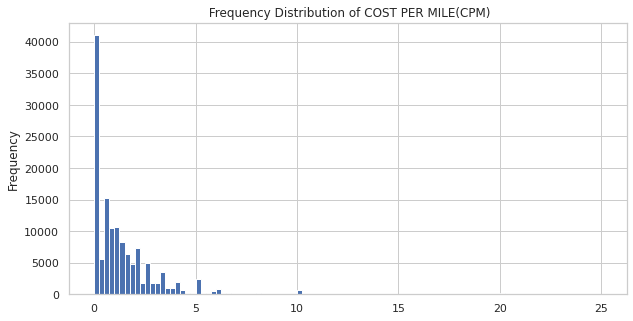

In [ ]:
# Visualization
CPM.dropna().plot.hist(bins=100,figsize = (10,5), title = ' Frequency Distribution of COST PER MILE(CPM)')

We can see the frequency of cost per mile is higher between 0 and 5.

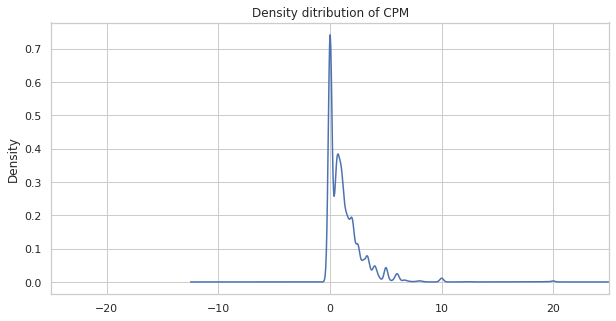

In [ ]:
with pd.option_context('mode.use_inf_as_na', True):
  CPM.dropna().plot.density(figsize = (10,5), xlim = (-25,25), title = 'Density ditribution of CPM')

# REVENUE PER MILE(RPM)

---



---



How much advertiser is paying company per 1000 impressions?

**Revenue Per Mile ( RPM ) = $ ( Total conversions / Total impressions ) *1000 *65 (as of 1/31)**

**Revenue Per Mile (RPM) = $ ( Total conversions / Total impressions ) *1000 *60.50 ( through 1/30 )**

In [ ]:
# Creation of new Data Frame splitting the dates
on_jan31_df= df[(df['date'] == '2018-01-31')]
before_jan31_df= df[(df['date'] < '2018-01-31')]
RPM1 = (on_jan31_df['conversions']* 65*1000).divide(on_jan31_df['impressions'])
RPM2 = (before_jan31_df['conversions']* 60.50*1000).divide(before_jan31_df['impressions'])

# Concatenation
RPM = pd.concat([RPM2,RPM1])

In [ ]:
with pd.option_context('mode.use_inf_as_na', True):
  print('The average value of money advertiser is paying company per 1000 impressions is = $',RPM.dropna().mean())  

The average value of money advertiser is paying company per 1000 impressions is = $ 3.4615105959779022


The average value of money advertiser is paying the company per 1000 impressions is = $ 3.4615105959779022


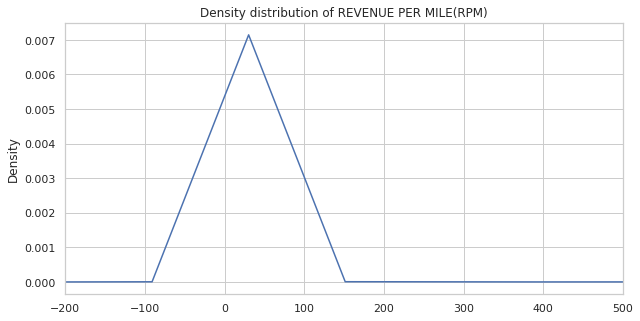

In [ ]:
# Visualization
with pd.option_context('mode.use_inf_as_na', True):
  RPM.dropna().plot.density(figsize = (10,5), xlim = (-200,500), title = 'Density distribution of REVENUE PER MILE(RPM)')


#PROFIT PER MILE(PPM)
Note : Staff and other operating expenses is not included



**PROFIT PER MILE (PPM) = REVENUE PER MILE (RPM) - COST PER MILE (CPM)**

In [ ]:
# Calculation
PPM = RPM - CPM
with pd.option_context('mode.use_inf_as_na', True): 
   print('The average value of PPM without including staff and other operating expenses is = $',PPM.dropna().mean())

The average value of PPM without including staff and other operating expenses is = $ 2.1457725842339204


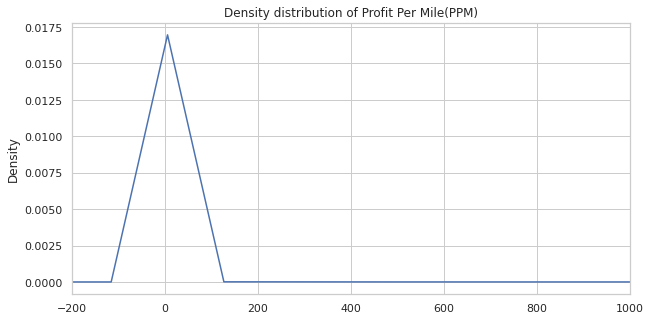

In [ ]:
#Visualization of PPM
with pd.option_context('mode.use_inf_as_na', True):
  PPM.dropna().plot.density(figsize = (10,5), xlim = (-200,1000), title ='Density distribution of Profit Per Mile(PPM)')

# Creating a new data table including PPM CPM and RPM

In [ ]:
# Creation of new data table
analysis_df = pd.concat([RPM,CPM,PPM],axis=1)
analysis_df.columns= ["RPM","CPM","PPM"]
with pd.option_context('mode.use_inf_as_na', True):
  print(analysis_df.dropna().describe())
merged_df = pd.concat([df,analysis_df], axis =1)
merged_df.dropna(0)

                 RPM            CPM            PPM
count  134154.000000  134154.000000  134154.000000
mean        3.461511       1.315738       2.145773
std       237.360938       1.744144     237.353080
min         0.000000       0.000000     -25.000000
25%         0.000000       0.000000      -1.855589
50%         0.000000       0.857143      -0.833333
75%         0.000000       1.891892       0.000000
max     60500.000000      25.000000   60500.000000


,date,device,creative_id,ad_unit_id,publisher_split,impressions,referrals,conversions,RPM,CPM,PPM
0,2017-12-01,Desktop,12,1,0.17,21,1,0,0.0,8.095238,-8.095238
1,2017-12-01,Desktop,55,1,0.10,13,0,0,0.0,7.692308,-7.692308
2,2017-12-01,Desktop,54,1,3.41,426,13,0,0.0,8.004695,-8.004695
3,2017-12-01,Desktop,10,1,3.01,376,19,0,0.0,8.005319,-8.005319
4,2017-12-01,Desktop,13,1,0.17,21,1,0,0.0,8.095238,-8.095238
...,...,...,...,...,...,...,...,...,...,...,...
136915,2017-12-31,Other,28,Organic,0.00,1,0,0,0.0,0.000000,0.000000
136920,2017-12-31,Tablet,10,Organic,0.00,9,0,0,0.0,0.000000,0.000000
136921,2017-12-31,Tablet,23,Organic,0.00,8,0,0,0.0,0.000000,0.000000
136922,2017-12-31,Tablet,24,Organic,0.00,103,0,0,0.0,0.000000,0.000000


**WHAT IS THE TOTAL COST OF THE COMPANY FOR THE WHOLE MONTH?** 


Note : Operating cost and other expenses are not included.

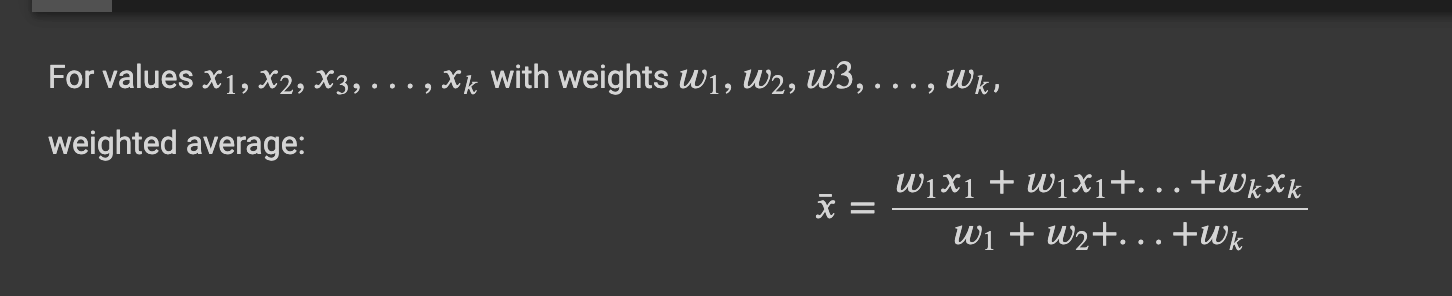

In [ ]:
weighted_sum_cost = (merged_df['CPM'].multiply(merged_df['impressions']/1000)).sum()
print(weighted_sum_cost)
weighted_average_cost = (weighted_sum_cost/((merged_df['impressions']/1000).sum()))
print(weighted_average_cost)

49560.850000000006
1.3601296041868443


The total money paid by Company to Publisher for whole Month is (TOTAL COST) = $ 49560.850000000006

The average cost per event (data point) is =  $ 1.3601296041868443

**WHAT IS THE TOTAL REVENUE OF THE COMPANY FOR THE WHOLE MONTH?**

---




In [ ]:
weighted_sum_revenue = (merged_df['RPM'].multiply(merged_df['impressions']/1000)).sum()
print(weighted_sum_revenue)
weighted_average_revenue = (weighted_sum_revenue/((merged_df['impressions']/1000).sum()))
print(weighted_average_revenue)

76532.5
2.1003295732908063


The total money advertiser is paying the company(Total Revenue) for whole month is = $ 76532.5

The average revenue per event is $ 2.1003295732908063

**WHAT IS THE TOTAL PROFIT OF THE COMPANY FOR THE WHOLE MONTH?**


NOTE: Operating cost and other expenses are not included.

In [ ]:
weighted_sum_profit = (merged_df['PPM'].multiply(merged_df['impressions']/1000)).sum()
print(weighted_sum_profit)
weighted_average_profit = (weighted_sum_profit/((merged_df['impressions']/1000).sum()))
print(weighted_average_profit)

26971.649999999994
0.7401999691039618


The total sum of profit earned by company(excluding operating cost and other expenses) for whole Month is = $ 26971.649999999994

The average profit per event is = $ 0.7401999691039618

#RPM Vs Dates Visualization

Text(0, 0.5, 'Revenue Per Mile')

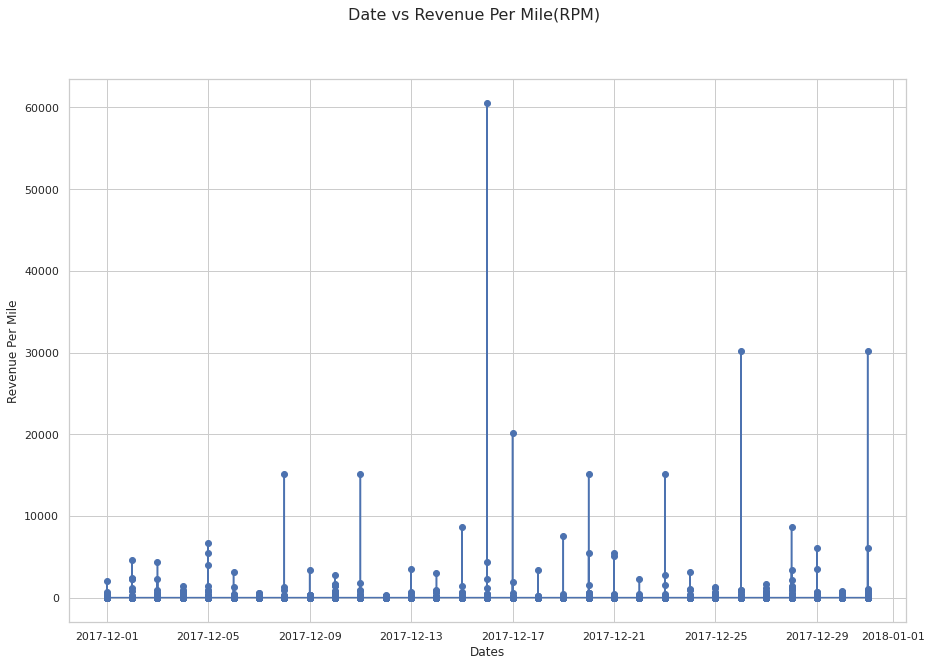

In [ ]:
# Visualization
plt.figure(figsize=(15,10))
dates = matplotlib.dates.date2num(df['date'])
plt.plot_date(merged_df['date'], merged_df['RPM'], linestyle = '-')
pl.suptitle('Date vs Revenue Per Mile(RPM)', fontsize=16)
pl.xlabel('Dates')
pl.ylabel('Revenue Per Mile')


From the above graph we can see that 16th of the month has highest amount of Revenue Per Mile.

# PPM vs Impressions Graph

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(0.0, 30000.0)

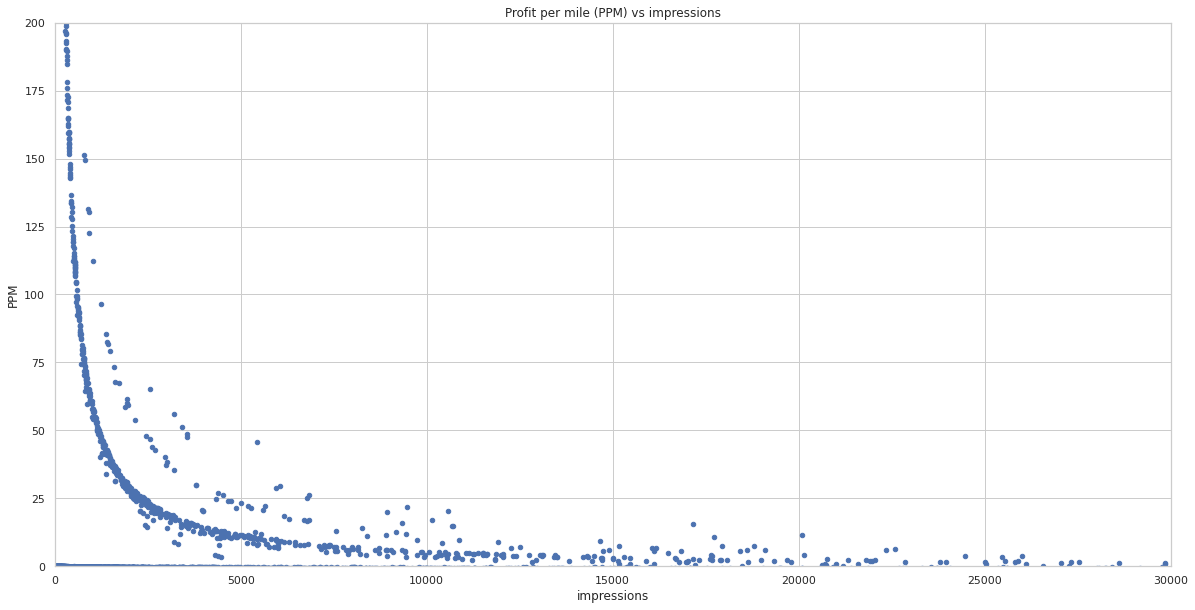

In [ ]:
# Visualization
merged_df.plot(kind = 'scatter',x = 'impressions' , y = 'PPM', figsize = (20,10) , title = 'Profit per mile (PPM) vs impressions')
plt.ylim(0,200)
plt.xlim(0,30000)

As the number of impressions is increasing the PPM is decreasing. This shows that they are negatively correlated. This is due to the reason that less amount of impressions are being converted and which is decreasing revenue and increasing the cost. We need to optimize the impressions to increase revenue.

#Let's plot Profit VS creative_id graph according to device type used

**Let's define a function first**

In [ ]:
def Creative_id_profit(device):
  df_Creative_id_profit = [] #Creating a new data frame
  for creative_id in merged_df['creative_id'].unique():
    rows = merged_df[(merged_df['creative_id'] == creative_id) & (merged_df['device'] == device)]
    c = (rows['PPM'].multiply(rows['impressions']/1000)).sum()
    df_Creative_id_profit.append([creative_id,c])
  df_Creative_id_profit = pd.DataFrame(df_Creative_id_profit, columns=['creative_id', 'Profit'])
  df_Creative_id_profit = df_Creative_id_profit.sort_values(by=['creative_id'])
  df_Creative_id_profit.plot(kind = 'bar', x = 'creative_id', y = 'Profit', figsize = (20,8), title = 'Profit vs creative_id when devices used were : '+str(device))
  plt.xlabel('Creative_id')
  plt.ylabel('Profit')
  return df_Creative_id_profit

1. **Creative_id vs Profit when Desktop devices were used**

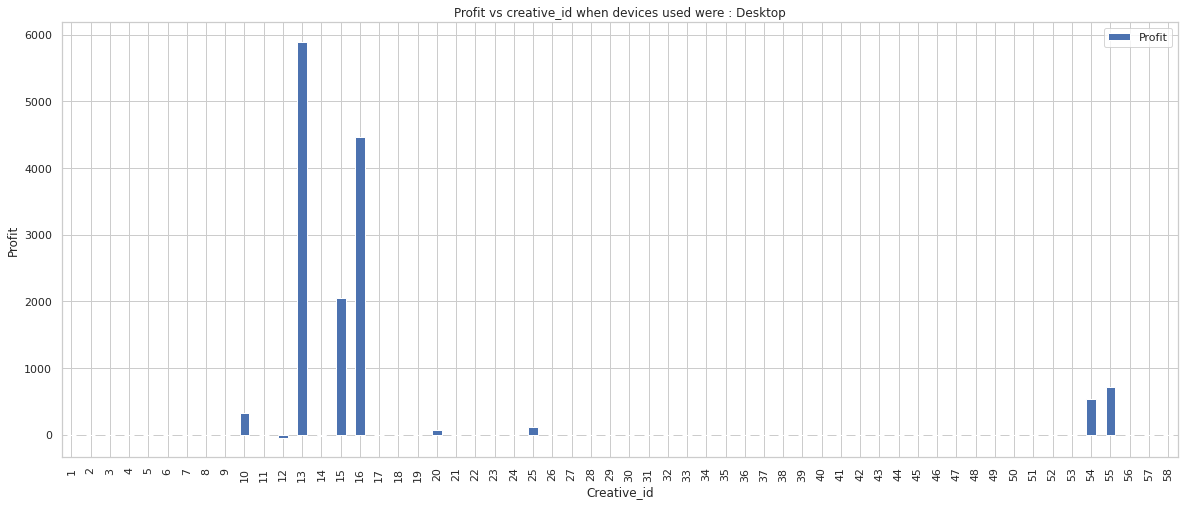

In [ ]:
Desktop_creative_id_profit = Creative_id_profit('Desktop')

Creative id's 20 has least amount of profit while 12 has loss.

2. **Creative_id vs Profit when Mobile devices were used**

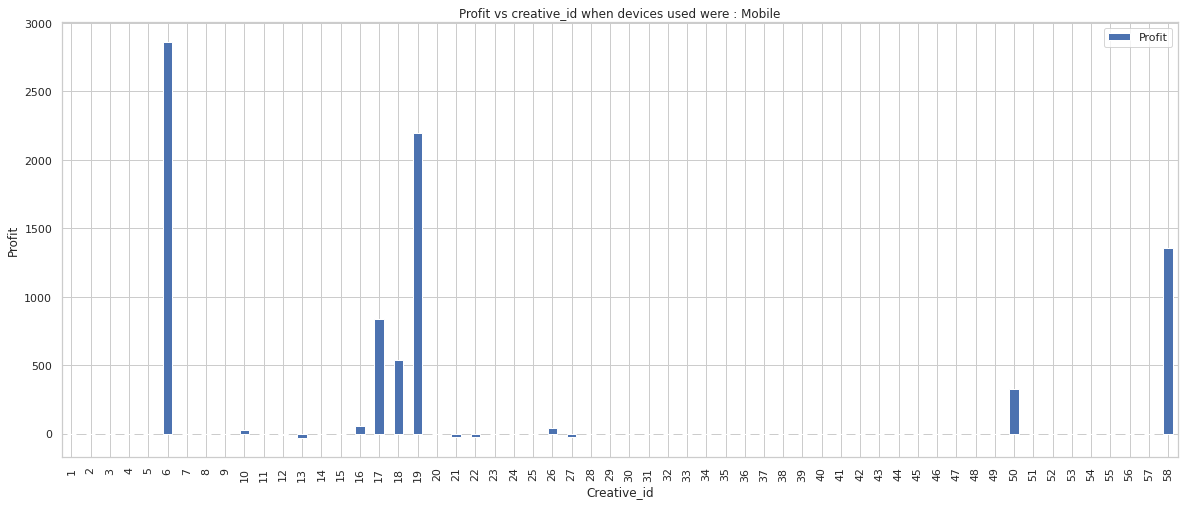

In [ ]:
Mobile_creative_id_profit = Creative_id_profit('Mobile')

Creative id's 10, 13, 16, 21, 22, 26, 27 has either very small profit or loss.

3. **Creative_id vs Profit when Tablet devices were used**

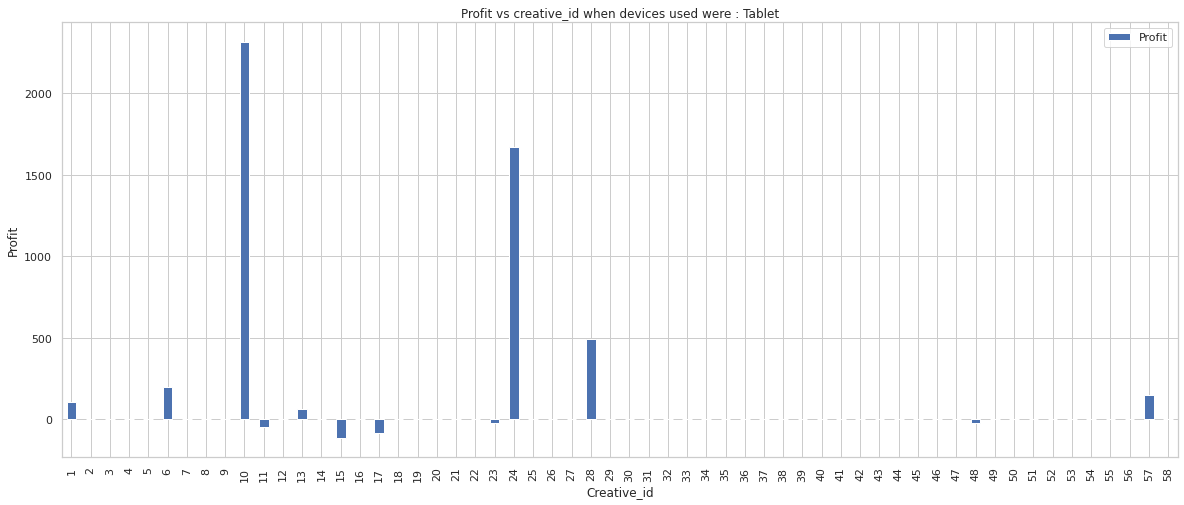

In [ ]:
Tablet_creative_id_profit = Creative_id_profit('Tablet')


Creative id's 11,13, 15 ,17, 23 , 48 has either very small profit or loss.

#Let's plot a combined graph for Creative id vs Profit according the device used.

Text(0, 0.5, 'Profit')

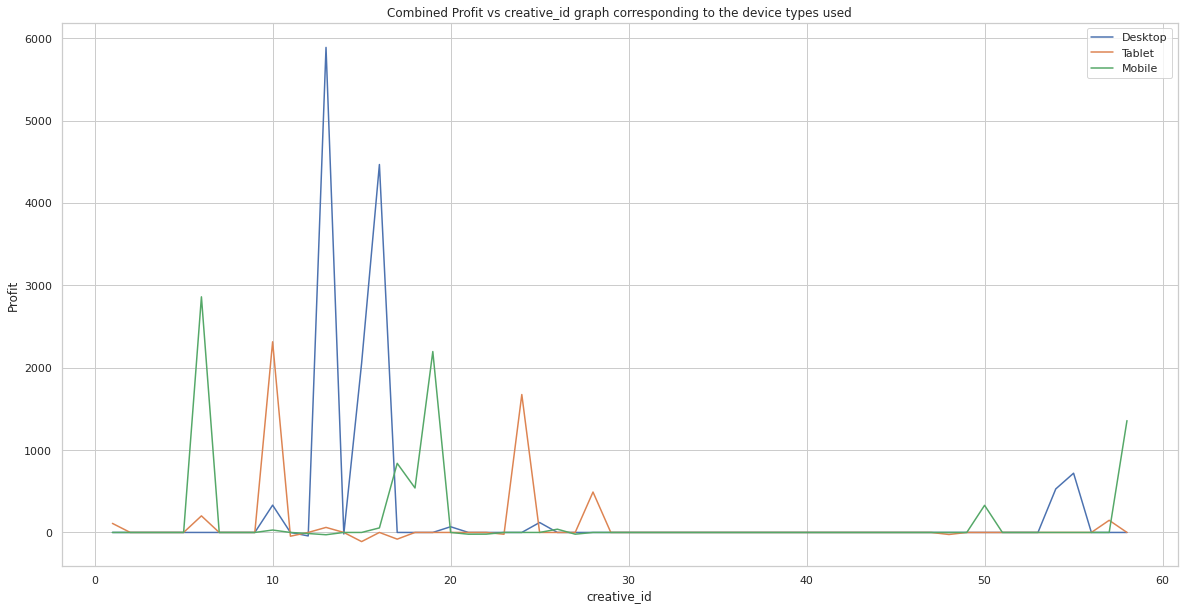

In [ ]:
#Visualization
plt.figure(figsize=(20,10))
plt.plot(Desktop_creative_id_profit['creative_id'], Desktop_creative_id_profit['Profit'] , label = 'Desktop')
plt.plot(Tablet_creative_id_profit['creative_id'], Tablet_creative_id_profit['Profit'] , label = 'Tablet')
plt.plot(Mobile_creative_id_profit['creative_id'], Mobile_creative_id_profit['Profit'] , label = 'Mobile')
plt.legend()
plt.title('Combined Profit vs creative_id graph corresponding to the device types used')
plt.xlabel('creative_id')
plt.ylabel('Profit')

#Visualization of Profit VS Ad_unit_id corresponding to the device used

#Firstly define a function that takes device type as an argument and returns a DataFrame containing necessary information.

In [ ]:
def Profit_ad_unit_id(device):
  df_Profit_ad_unit_id = []
  for ad_unit_id in merged_df['ad_unit_id'].unique():
    rows = merged_df[(merged_df['ad_unit_id'] == ad_unit_id) & (merged_df['device'] == device)]
    c = (rows['PPM'].multiply(rows['impressions']/1000)).sum()
    df_Profit_ad_unit_id.append([ad_unit_id,c])
  df_Profit_ad_unit_id = pd.DataFrame(df_Profit_ad_unit_id, columns=['ad_unit_id', 'Profit'])
  df_Profit_ad_unit_id = df_Profit_ad_unit_id[df_Profit_ad_unit_id.ad_unit_id != 'Organic']
  df_Profit_ad_unit_id = df_Profit_ad_unit_id.sort_values(by=['ad_unit_id'])
  plt.figure()
  df_Profit_ad_unit_id.plot(x = 'ad_unit_id', y = 'Profit', figsize = (20,10),title = 'Total Profit Vs ad_unit_id id when devices used were :'+str(device))
  plt.ylabel('Total Revenue')
  return df_Profit_ad_unit_id

1. **Profit vs ad_unit_id when Mobile device was used**

<Figure size 432x288 with 0 Axes>

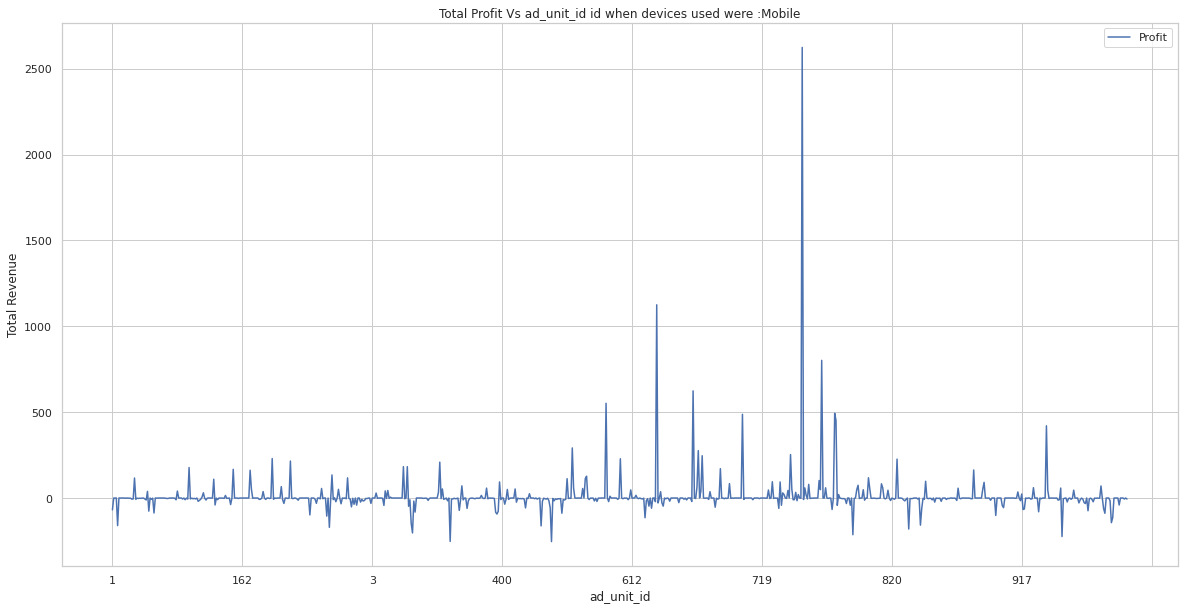

In [ ]:
Mobile_Profit_ad_unit_id = Profit_ad_unit_id('Mobile')


The visualization is not that much clear. So, let's split the ad_unit_id into two parts and plot the graph.

**Let's define another function that plots graph for ad_unit_id more than 600:**

In [ ]:
def more_than_600_Profit_ad(device_revenue_vs_ad_df):
    # Creating a new data frame
    device_revenue_vs_ad_df= device_revenue_vs_ad_df[(device_revenue_vs_ad_df['ad_unit_id'].astype(int)> 600)]
    # Visualization
    plt.figure()
    device_revenue_vs_ad_df.plot(x = 'ad_unit_id', y = 'Profit', figsize = (20,10), title = 'Profit Vs ad_unit_id(more than 600)')
    plt.ylabel('Revenue')

In [ ]:
def less_than_600_Profit_ad(device_revenue_vs_ad_df):
    # Creating a new data frame
    device_revenue_vs_ad_df= device_revenue_vs_ad_df[(device_revenue_vs_ad_df['ad_unit_id'].astype(int)< 600)]
    # Visualization
    plt.figure()
    device_revenue_vs_ad_df.plot(x = 'ad_unit_id', y = 'Profit', figsize = (20,10), title = 'Profit Vs ad_unit_id(more than 600)')
    plt.ylabel('Revenue')

1.1 **For ad_unit_it less than 600**

<Figure size 432x288 with 0 Axes>

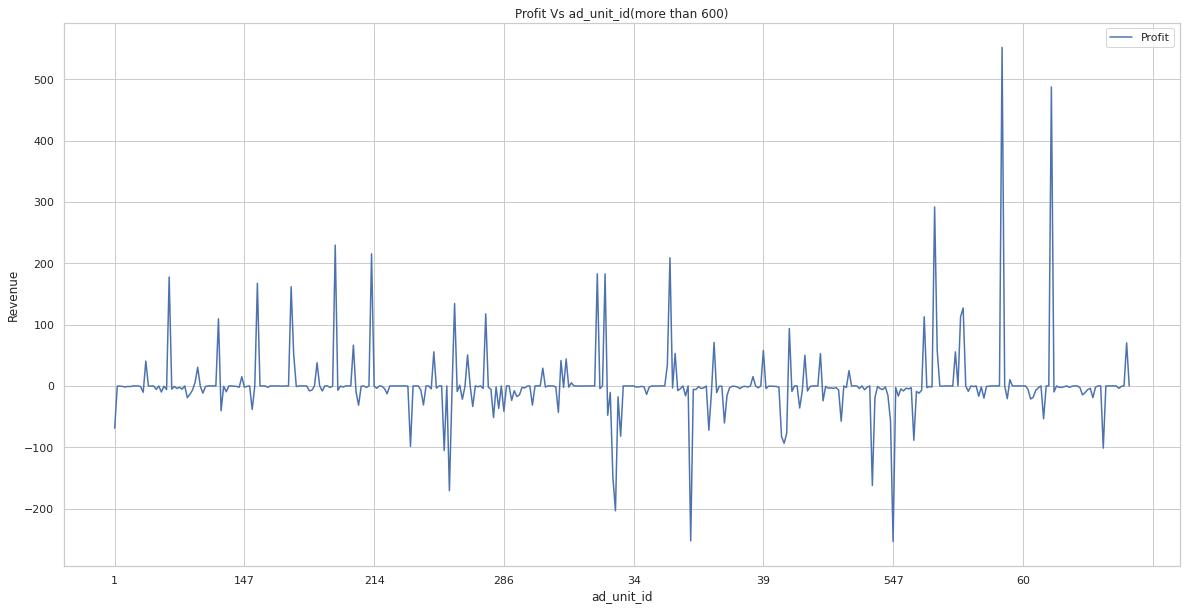

In [ ]:
less_than_600_Profit_ad(Mobile_Profit_ad_unit_id)

1.2 **For ad_unit_id more than 600**

<Figure size 432x288 with 0 Axes>

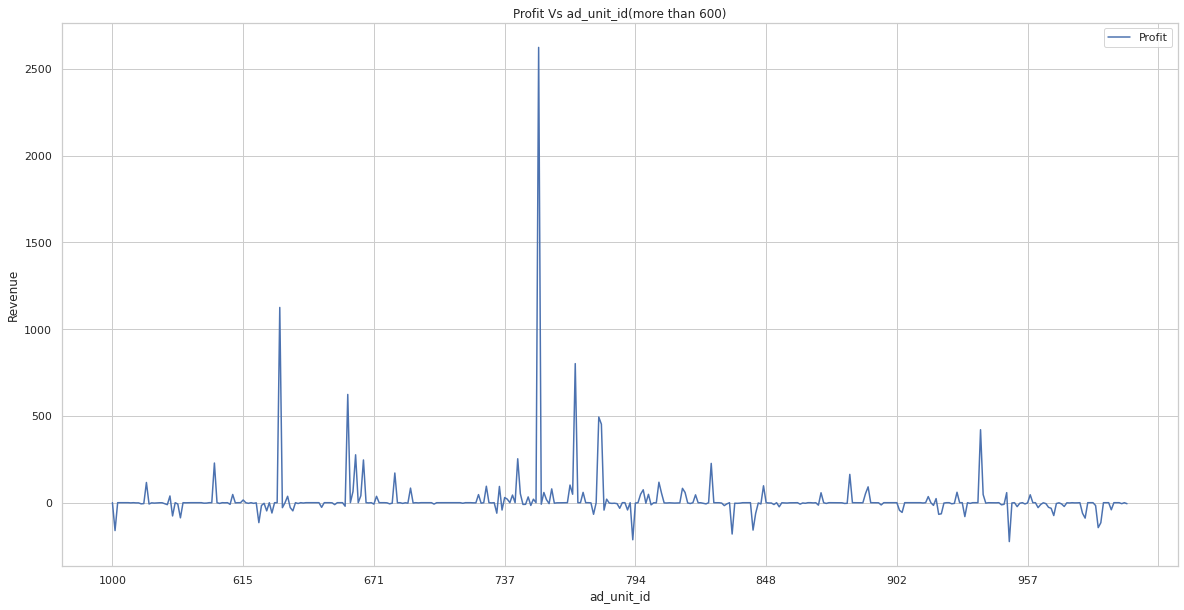

In [ ]:
more_than_600_Profit_ad(Mobile_Profit_ad_unit_id)

2. **Profit vs ad_unit_id when Desktop device was used**

<Figure size 432x288 with 0 Axes>

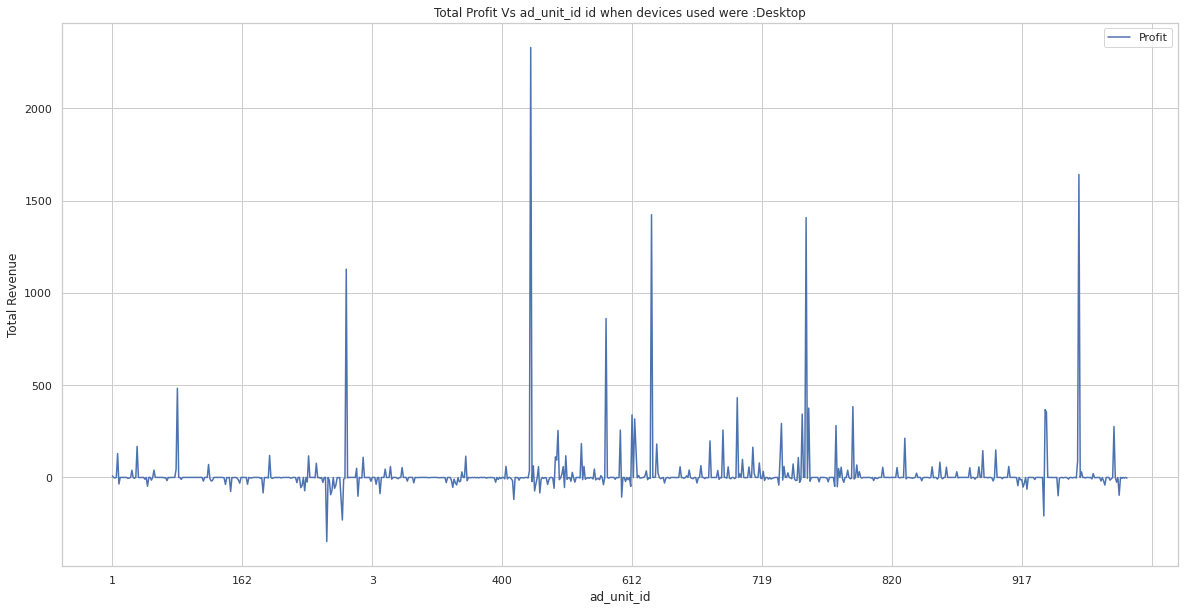

In [ ]:
Desktop_Profit_ad_unit_id = Profit_ad_unit_id('Desktop')


2.1 **For ad_unit_it less than 600**

<Figure size 432x288 with 0 Axes>

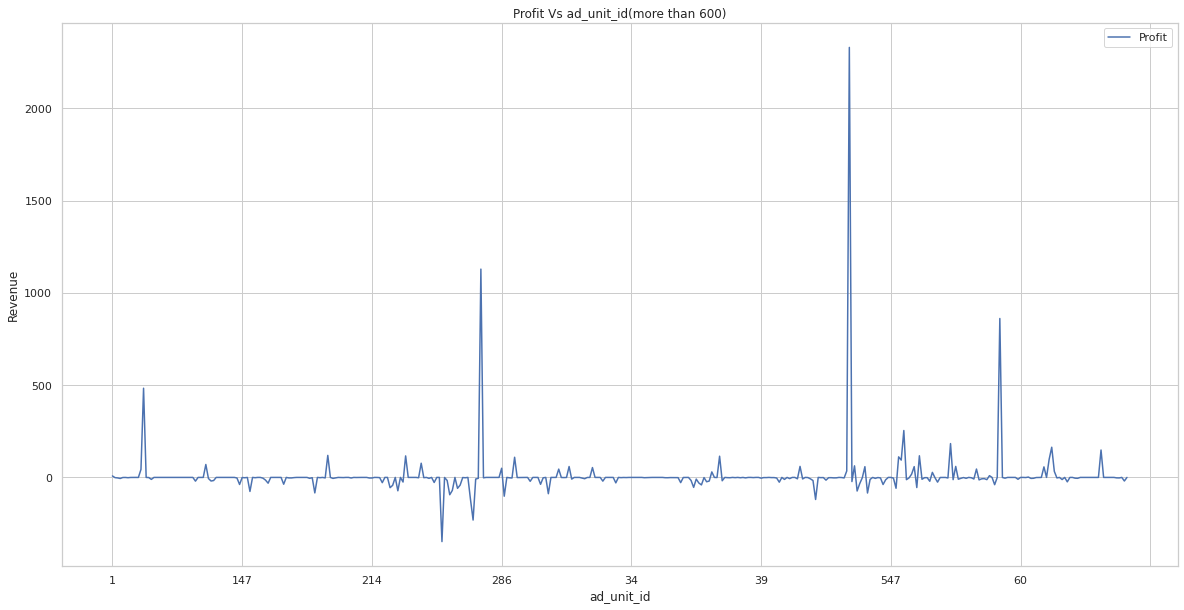

In [ ]:
less_than_600_Profit_ad(Desktop_Profit_ad_unit_id)

2.2 **For ad_unit_id more than 600**

<Figure size 432x288 with 0 Axes>

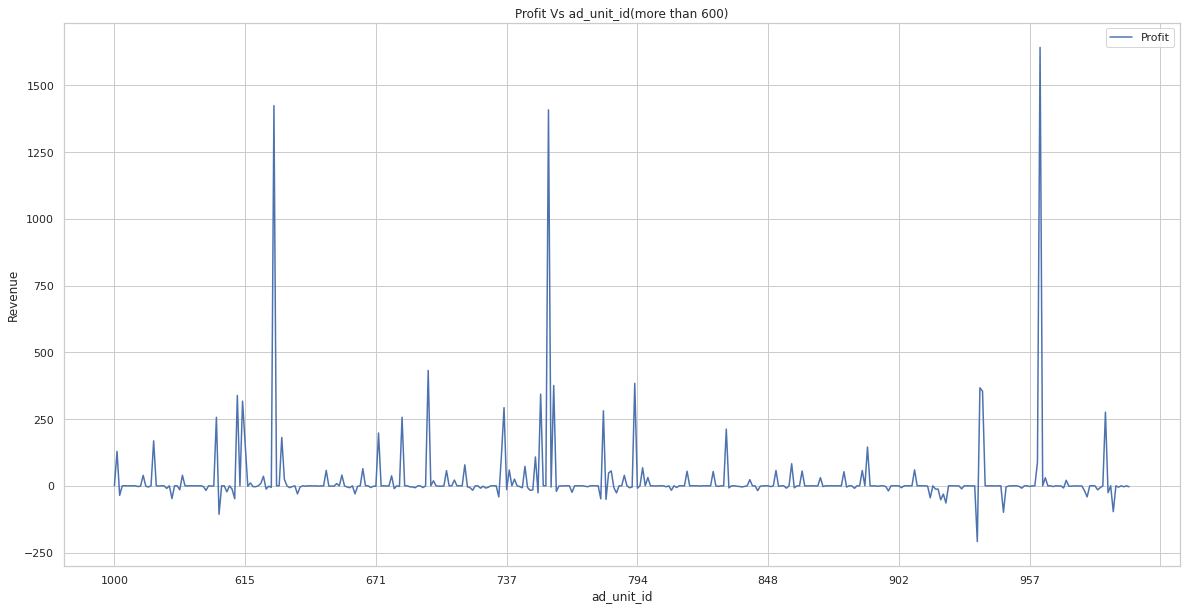

In [ ]:
more_than_600_Profit_ad(Desktop_Profit_ad_unit_id)

2. **Profit vs ad_unit_id when Tablet device was used**

<Figure size 432x288 with 0 Axes>

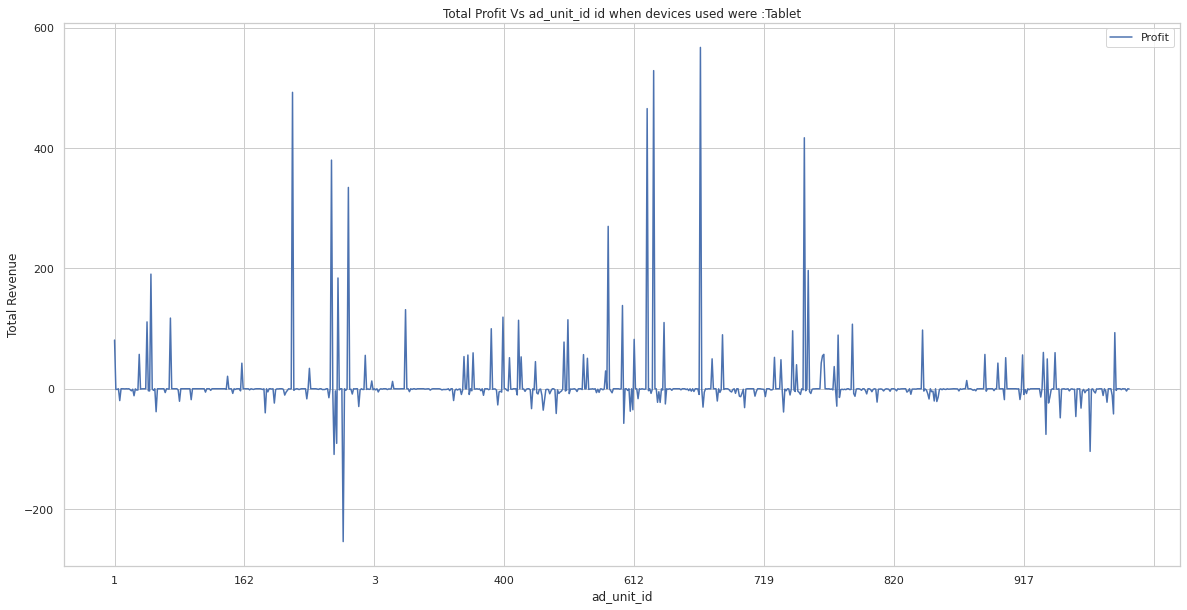

In [ ]:
Tablet_Profit_ad_unit_id = Profit_ad_unit_id('Tablet')


2.1 **For ad_unit_it less than 600**

<Figure size 432x288 with 0 Axes>

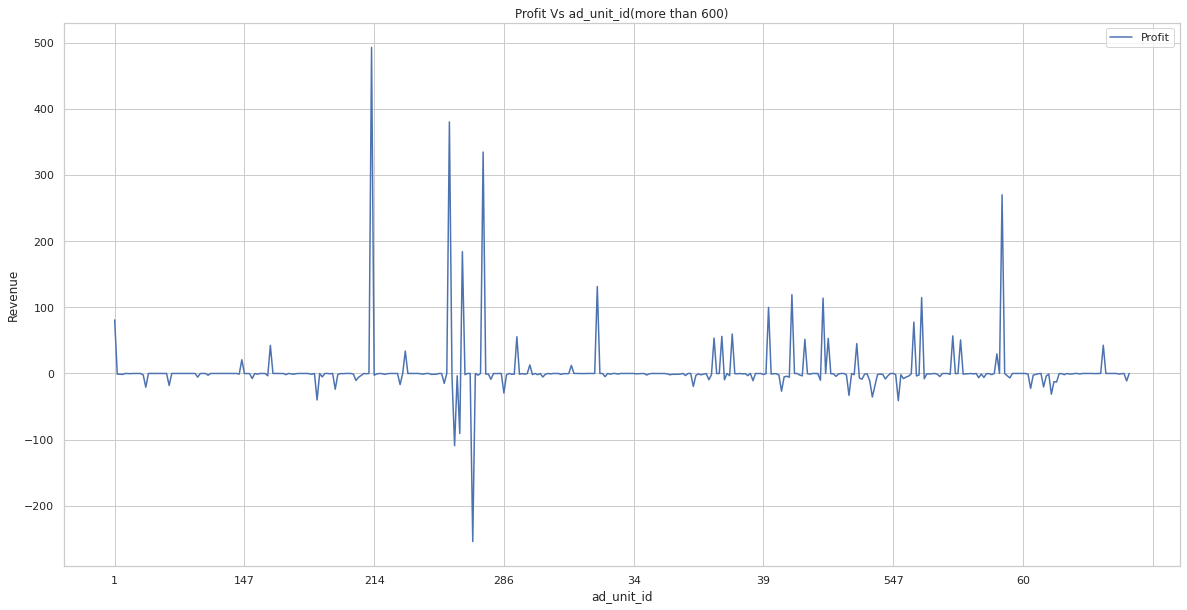

In [ ]:
less_than_600_Profit_ad(Tablet_Profit_ad_unit_id)

2.2 **For ad_unit_id more than 600**

<Figure size 432x288 with 0 Axes>

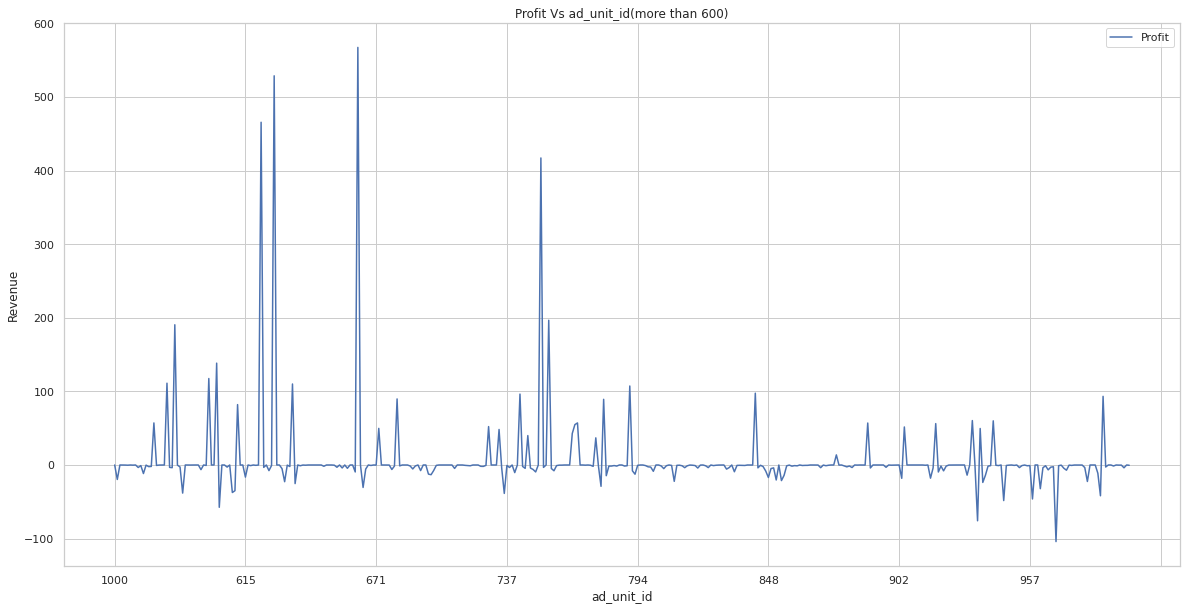

In [ ]:
more_than_600_Profit_ad(Tablet_Profit_ad_unit_id)

#Visualization of Total profit vs Dates as per the Devices used by Users.

#Firstly define a function that takes device type as an argument and returns a DataFrame containing necessary information.

In [ ]:
def Profit_date(device):
  df_Profit_date = [] #Creating a new data frame
  for date in merged_df['date'].unique():
    rows = merged_df[(merged_df['date'] == date) & (merged_df['device'] == device)]
    c = (rows['PPM'].multiply(rows['impressions']/1000)).sum()
    df_Profit_date.append([date,c])
  df_Profit_date = pd.DataFrame(df_Profit_date, columns=['date', 'Profit'])
  df_Profit_date = df_Profit_date.sort_values(by=['date'])
  df_Profit_date['date'] = df_Profit_date['date'].dt.date
  df_Profit_date.plot(kind = 'bar', x = 'date', y = 'Profit', figsize = (20,8), title = 'Profit vs Date when devices used were : '+str(device))
  plt.xlabel('Dates')
  plt.ylabel('Profit')
  return df_Profit_date

1. **Total profit Vs Dates when Mobile Devices were used by users**

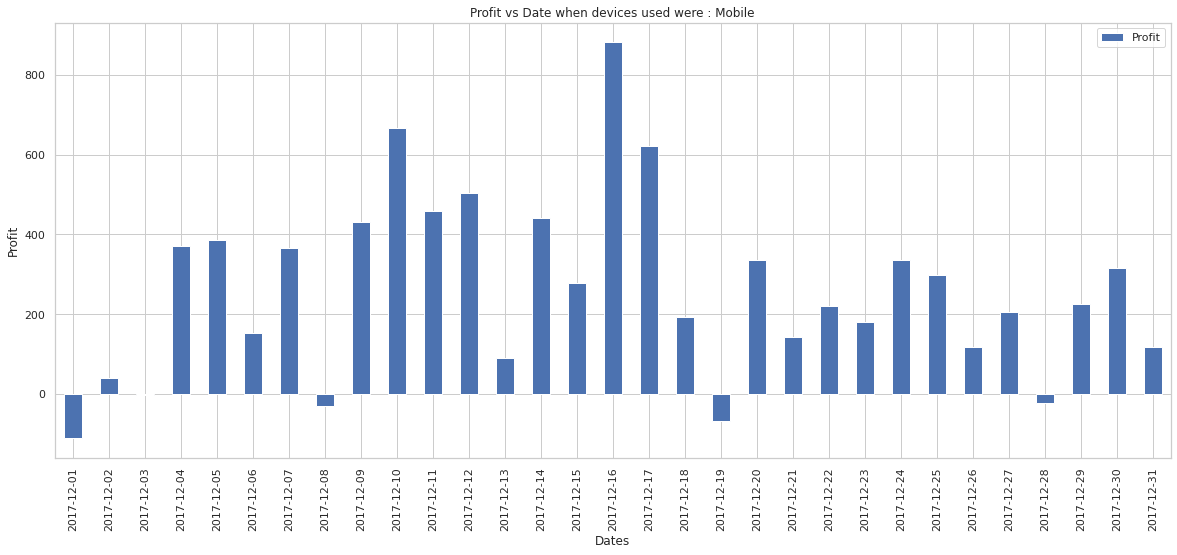

In [ ]:
profit_date_Mobile_df = Profit_date('Mobile')

From the above graph we can see that, when the device used by users is Mobile , company has highest profit on 66th of the month and with highest loss on 1st.

2. **Total Profit VS dates when Desktop Devices were used by Users**

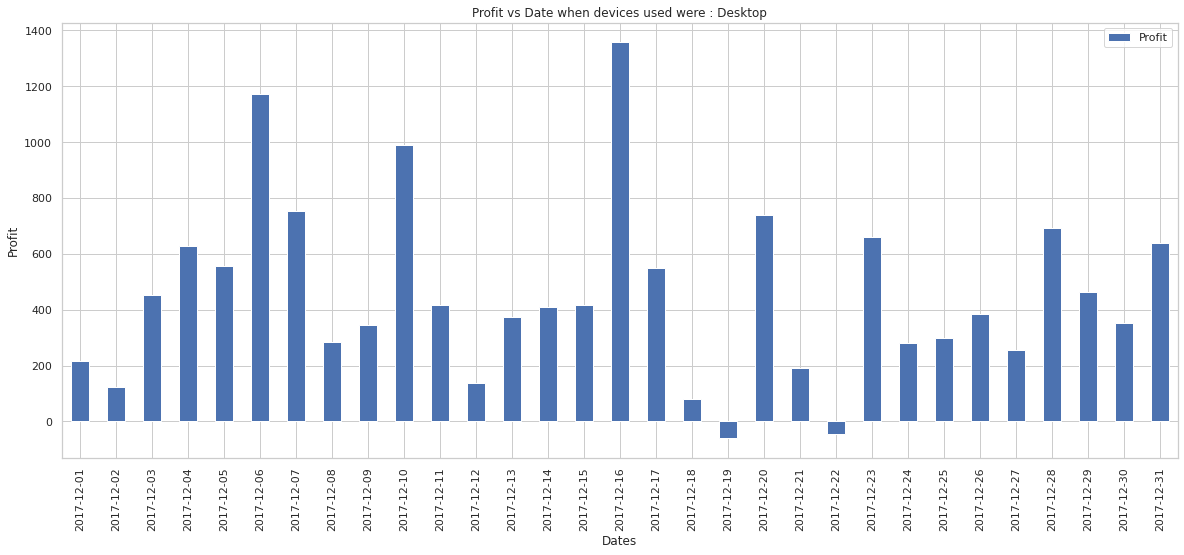

In [ ]:
profit_date_Desktop_df = Profit_date('Desktop')

From the above graph we can see that, when the device used by users is Desktop , company has highest profit on 16th of the month and highest loss on 19th.

3. **Total profit Vs Dates when Tablet devices were used by users.**

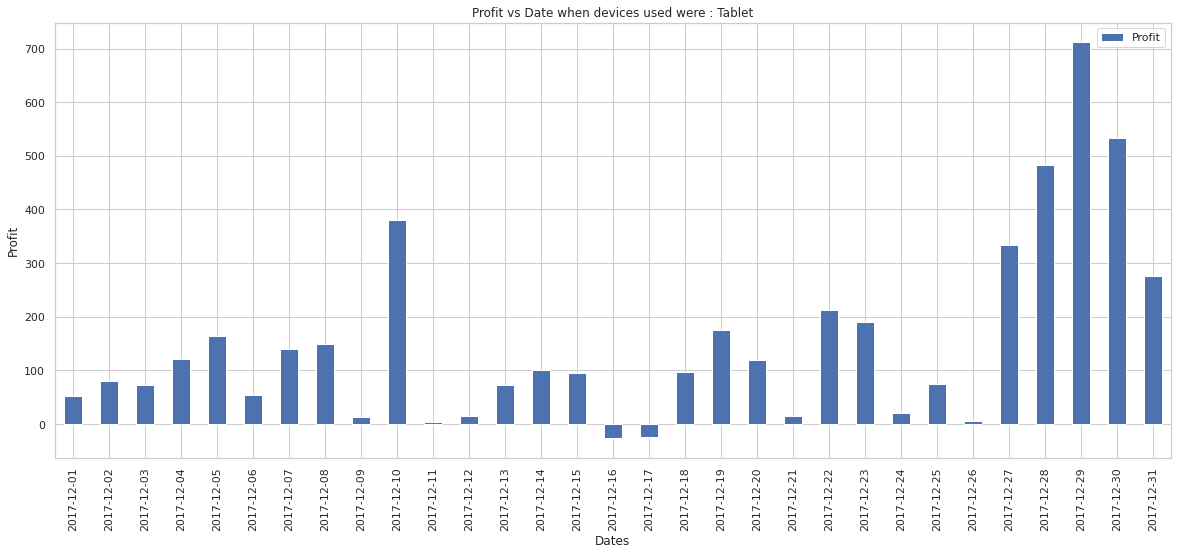

In [ ]:
profit_date_Tablet_df = Profit_date('Tablet')

From the above graph we can see that, when the device used by users is Tablet , company has highest profit on 29th of the month and loss on 16th and 17th.

#Lets plot combined Profit Vs Date graph corresponding to the device type used.

Text(0, 0.5, 'Profit')

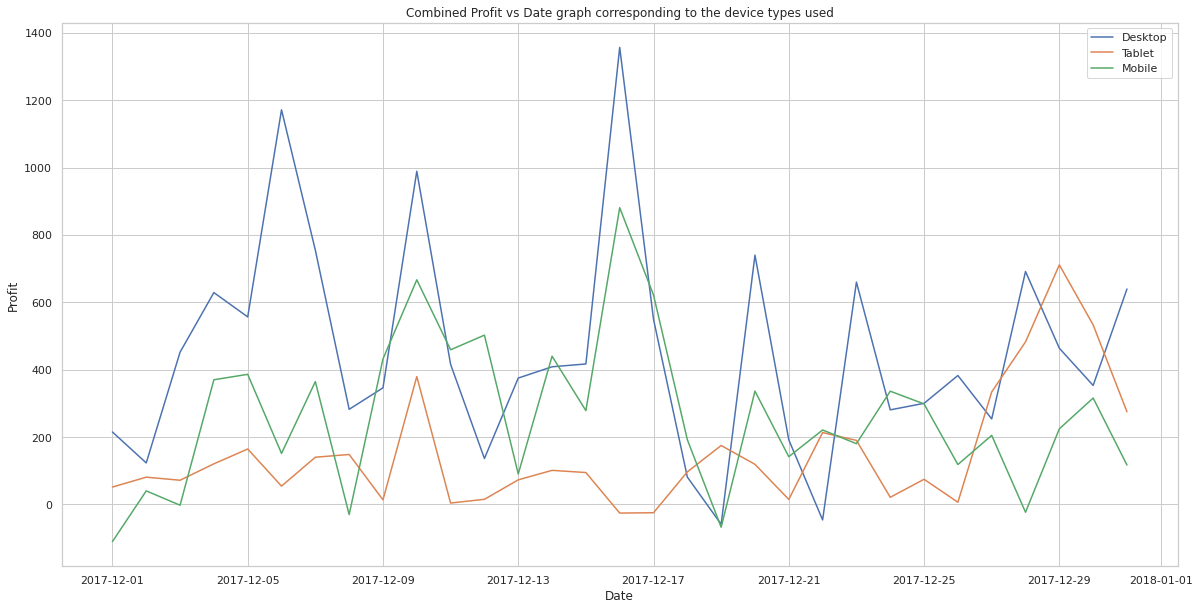

In [ ]:
#Visualization
plt.figure(figsize=(20,10))
plt.plot(profit_date_Desktop_df['date'], profit_date_Desktop_df['Profit'] , label = 'Desktop')
plt.plot(profit_date_Tablet_df['date'], profit_date_Tablet_df['Profit'] , label = 'Tablet')
plt.plot(profit_date_Mobile_df['date'], profit_date_Mobile_df['Profit'] , label = 'Mobile')
plt.legend()
plt.title('Combined Profit vs Date graph corresponding to the device types used')
plt.xlabel('Date')
plt.ylabel('Profit')

From the above graph, we can infer that, in most of the dates, Desktop devices are responsible for high amount of profit.

# Let's plot Total Cost vs Dates corresponding to the device types used by users.

**Let's define a function first**

In [ ]:
def Cost_date(device):
  df_Cost_date = [] #Creating a new data frame
  for date in merged_df['date'].unique():
    rows = merged_df[(merged_df['date'] == date) & (merged_df['device'] == device)]
    c = (rows['CPM'].multiply(rows['impressions']/1000)).sum()
    df_Cost_date.append([date,c])
  df_Cost_date = pd.DataFrame(df_Cost_date, columns=['date', 'Cost'])
  df_Cost_date = df_Cost_date.sort_values(by=['date'])
  df_Cost_date['date'] = df_Cost_date['date'].dt.date
  plt.figure()
  df_Cost_date.plot(x = 'date', y = 'Cost',kind = 'bar', figsize = (20,8), title = 'Cost vs Date  when Mobile Devices were used')
  plt.ylabel('Frequency')
  plt.xlabel('Date')
  plt.ylabel('Cost')
  return df_Cost_date

1. **When Mobile devices were used by users.**

<Figure size 432x288 with 0 Axes>

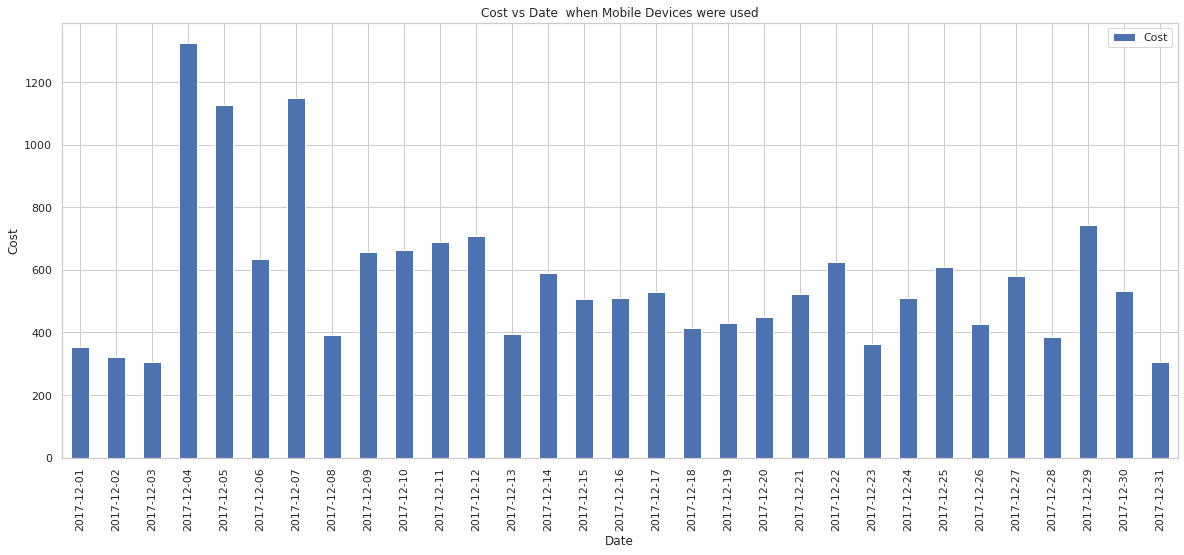

In [ ]:
Cost_date_Mobile = Cost_date('Mobile')

The money paid to the publisher by the company is highest on 4th of the month and lowest on 3rd of the month when Mobile Devices were used by users.

2. **When Desktop Devices were used by users.**

<Figure size 432x288 with 0 Axes>

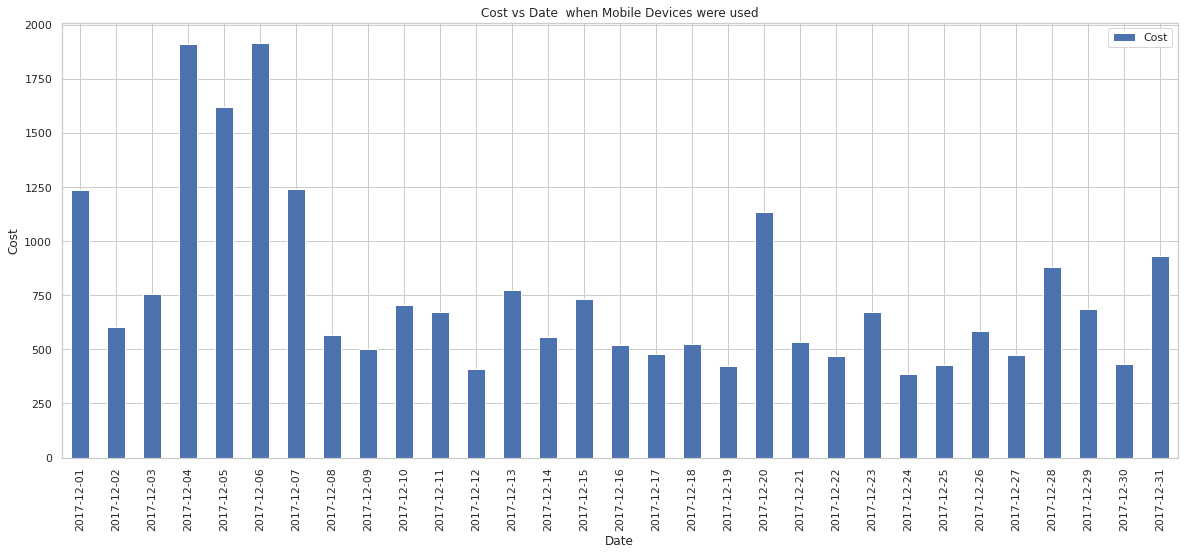

In [ ]:
Cost_date_Desktop = Cost_date('Desktop')

The money paid to the publisher by the company is highest on 4th and 6th of the month and lowest on 12th of the month when Desktop Devices were used by users.

3. **When Tablet Devices were used by users**

<Figure size 432x288 with 0 Axes>

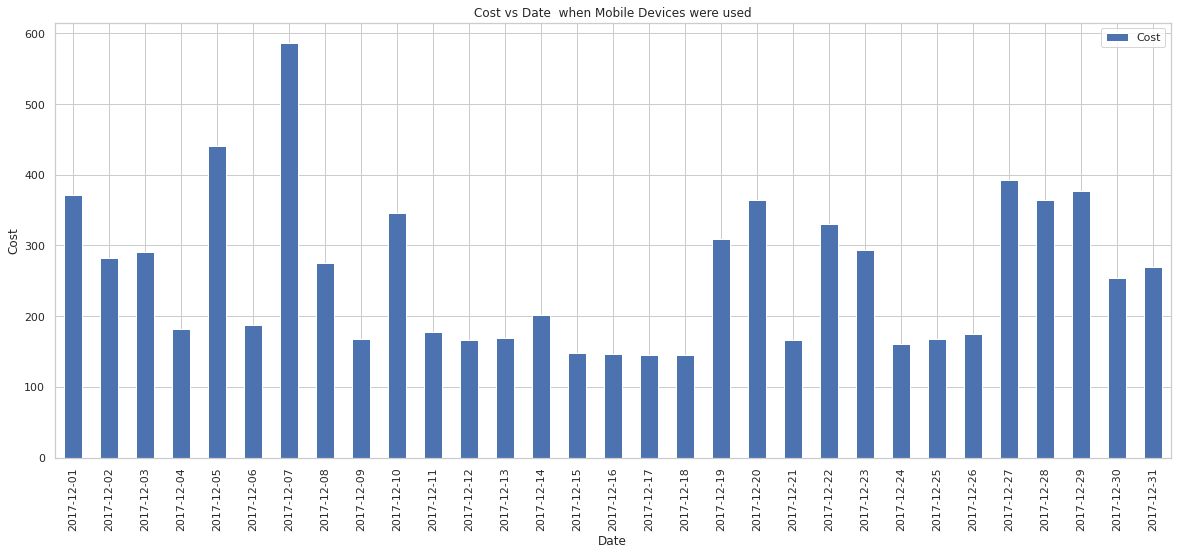

In [ ]:
Cost_date_Tablet = Cost_date('Tablet')

The money paid to the publisher by the company is highest on 3rd of the month and lowest on 17th, 15th and 16th  of the month when Tablet Devices were used by users.

# Let's plot combined cost vs date Graph for Corresponding devices

Text(0, 0.5, 'Cost')

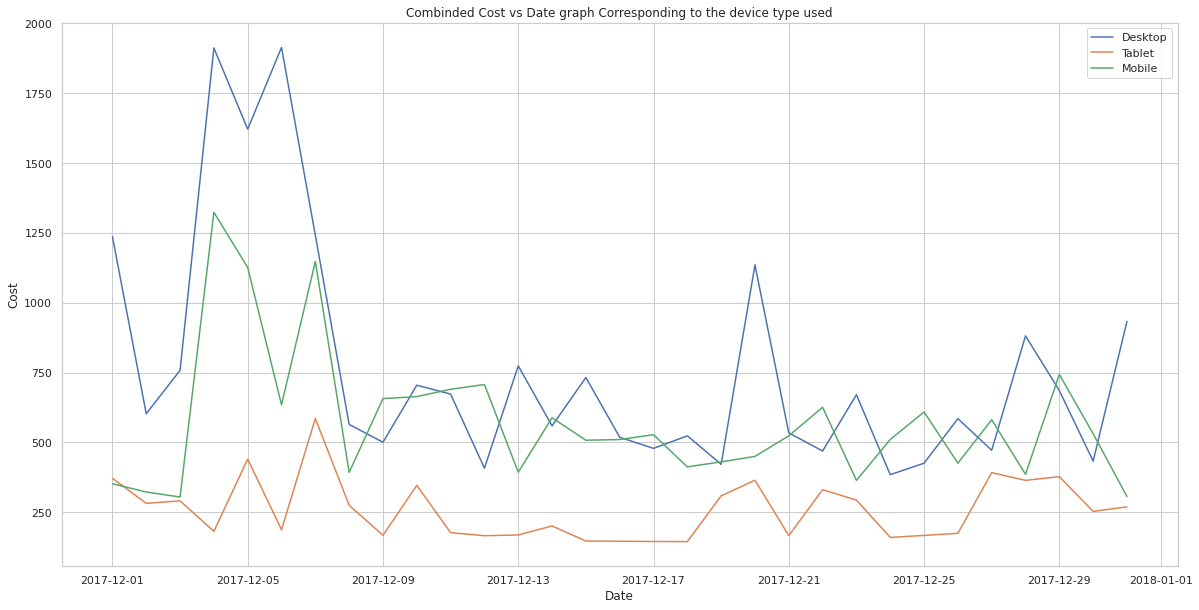

In [ ]:
# Visualization
plt.figure(figsize=(20,10))
plt.plot(Cost_date_Desktop['date'], Cost_date_Desktop['Cost'] , label = 'Desktop')
plt.plot(Cost_date_Tablet['date'], Cost_date_Tablet['Cost'] , label = 'Tablet')
plt.plot(Cost_date_Mobile['date'], Cost_date_Mobile['Cost'] , label = 'Mobile')
plt.title('Combinded Cost vs Date graph Corresponding to the device type used' )
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cost')

#Let's plot Revenue vs dates according the device used by users.

**Let's define a function first**

In [ ]:
def Revenue_date(device):
  df_Revenue_date = [] #Creating a new data frame
  for date in merged_df['date'].unique():
    rows = merged_df[(merged_df['date'] == date) & (merged_df['device'] == device)]
    c = (rows['RPM'].multiply(rows['impressions']/1000)).sum()
    df_Revenue_date.append([date,c])
  df_Revenue_date = pd.DataFrame(df_Revenue_date, columns=['date', 'Revenue'])
  df_Revenue_date = df_Revenue_date.sort_values(by=['date'])
  df_Revenue_date['date'] = df_Revenue_date['date'].dt.date
   #Visualization
  plt.figure()
  df_Revenue_date.plot(x = 'date',kind ='bar', y = 'Revenue', figsize = (20,8), title = 'Revenue vs Date  Devices used were Desktop')
  plt.xlabel('Date')
  plt.ylabel('Revenue')
  return df_Revenue_date

1.**Revenue vs dates when desktop devices were used by users.**

<Figure size 432x288 with 0 Axes>

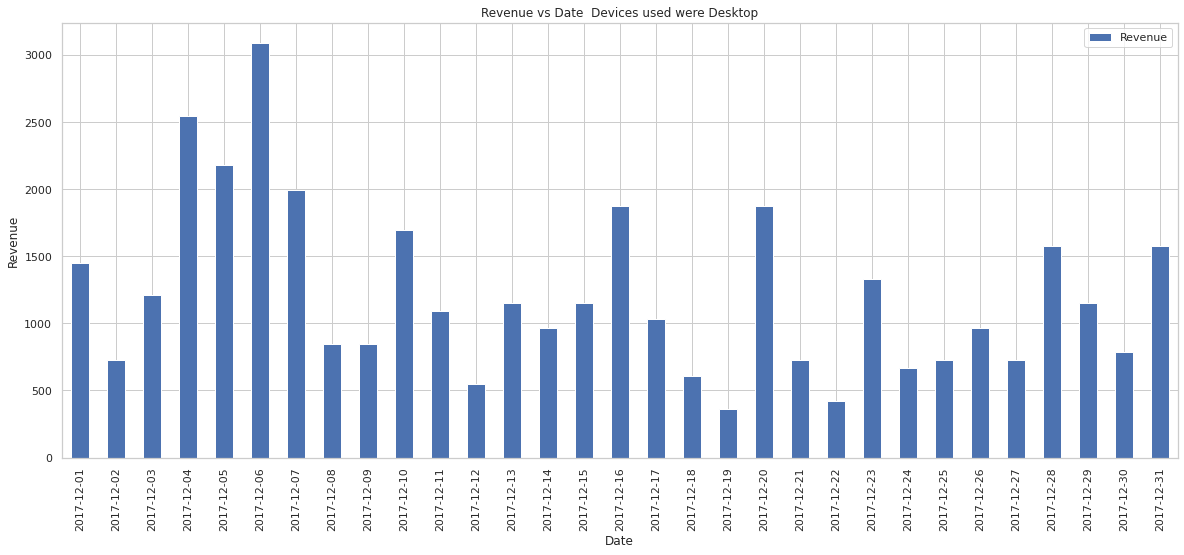

In [ ]:
Desktop_revenue_date = Revenue_date('Desktop')


We can see that on 6th the revenue was high as per the Desktop devices were used by users.

2.**Revenue vs date when Mobile devices were used by users.**

<Figure size 432x288 with 0 Axes>

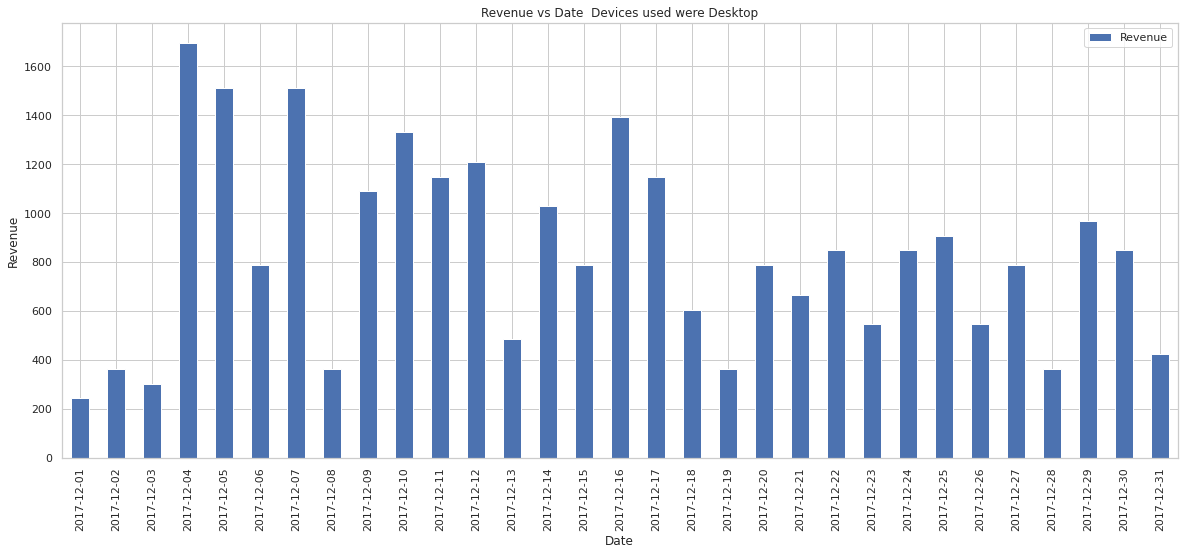

In [ ]:
Mobile_revenue_date = Revenue_date('Mobile')

We can see that maximum revenue is on 4th and lowest on 1st.

3. **Revenue vs date when Tablet devices were used by users.**

<Figure size 432x288 with 0 Axes>

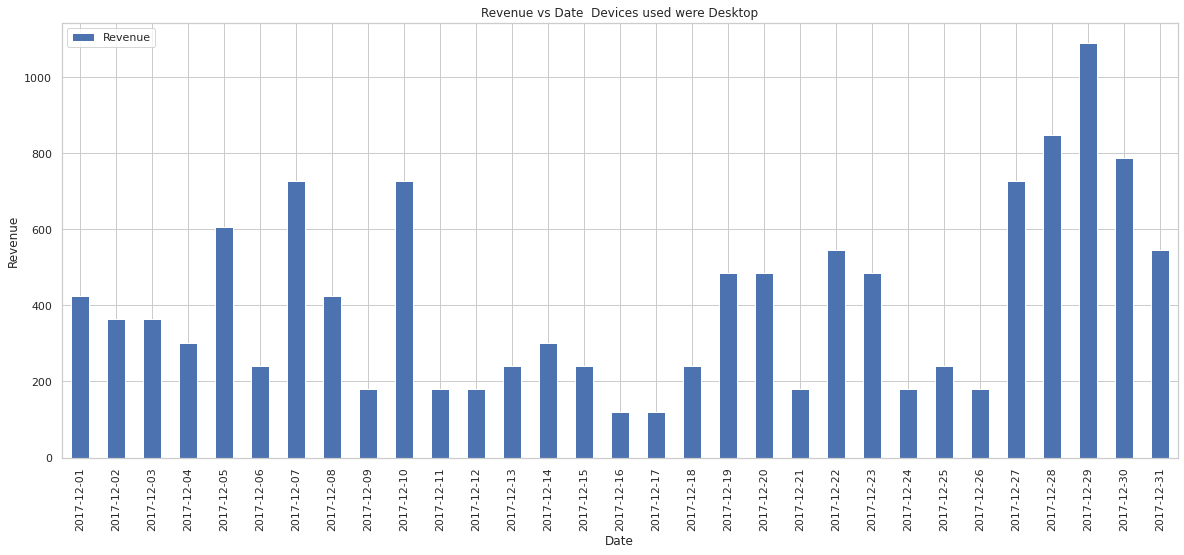

In [ ]:
Tablet_revenue_date = Revenue_date('Tablet')

We can see that maximum revenue is on 29th and lowest on 16th and 17th.

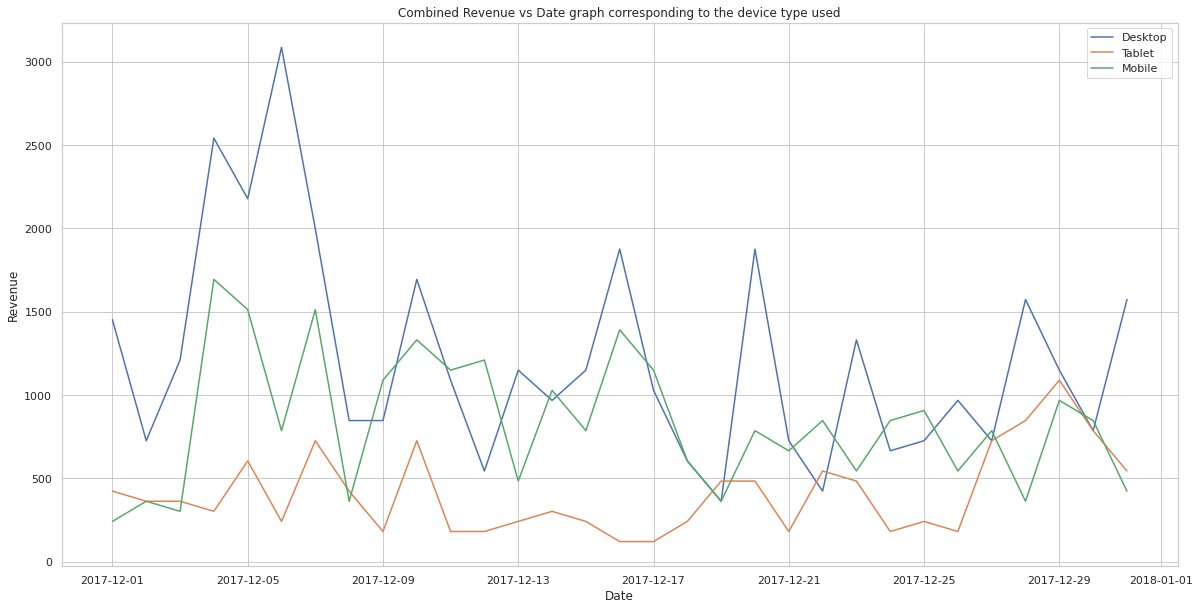

In [ ]:
# Visualization
plt.figure(figsize=(20,10))
plt.plot(Desktop_revenue_date['date'], Desktop_revenue_date['Revenue'] , label = 'Desktop')
plt.plot(Tablet_revenue_date['date'], Tablet_revenue_date['Revenue'] , label = 'Tablet')
plt.plot(Mobile_revenue_date['date'], Mobile_revenue_date['Revenue'] , label = 'Mobile')
plt.title('Combined Revenue vs Date graph corresponding to the device type used' )
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()

#Let's visualize  Revenue vs ad_unit_id Graph corresponding to the device type used.

#Firstly define a function that takes device type as an argument and returns a DataFrame containing necessary information.

In [ ]:
def Revenue_ad_unit_id(device):
  df_Revenue_ad_unit_id = []
  for ad_unit_id in merged_df['ad_unit_id'].unique():
    rows = merged_df[(merged_df['ad_unit_id'] == ad_unit_id) & (merged_df['device'] == device)]
    c = (rows['RPM'].multiply(rows['impressions']/1000)).sum()
    df_Revenue_ad_unit_id.append([ad_unit_id,c])
  df_Revenue_ad_unit_id = pd.DataFrame(df_Revenue_ad_unit_id, columns=['ad_unit_id', 'Revenue'])
  df_Revenue_ad_unit_id = df_Revenue_ad_unit_id[df_Revenue_ad_unit_id.ad_unit_id != 'Organic']
  df_Revenue_ad_unit_id = df_Revenue_ad_unit_id.sort_values(by=['ad_unit_id'])
  plt.figure()
  df_Revenue_ad_unit_id.plot(x = 'ad_unit_id', y = 'Revenue', figsize = (20,10),title = 'Total Revenue Vs ad_unit_id id when devices used were :'+str(device))
  plt.ylabel('Total Revenue')
  return df_Revenue_ad_unit_id

1. **Revenue vs ad_unit_id when Mobile device was used**

<Figure size 432x288 with 0 Axes>

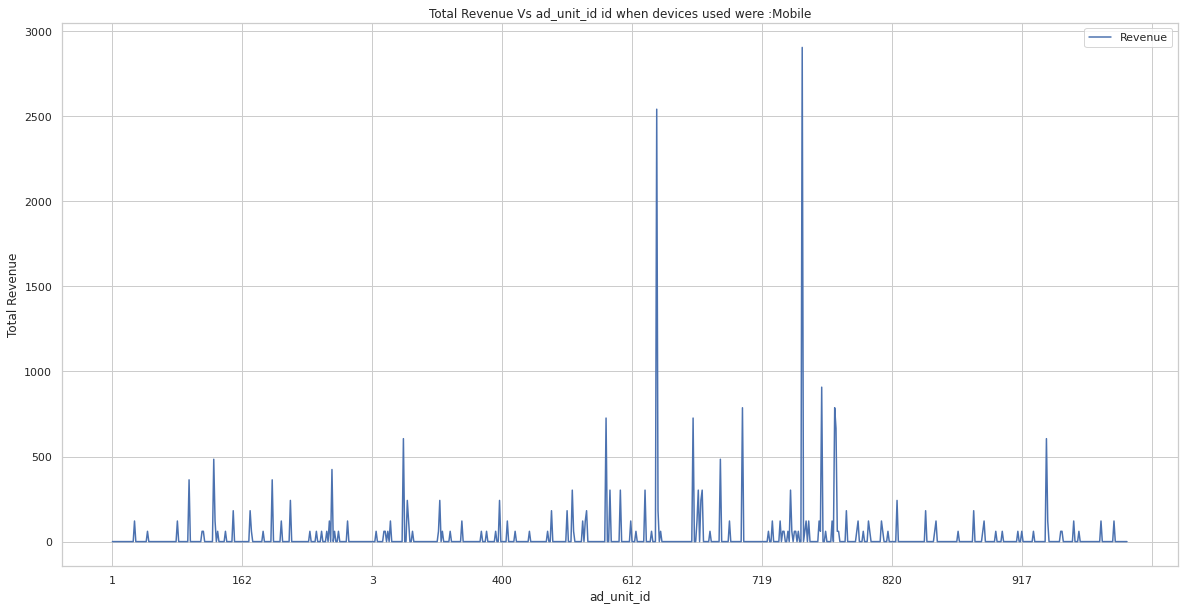

In [ ]:
Mobile_revenue_ad_unit_id = Revenue_ad_unit_id('Mobile')


The visualization is not that much clear. So, let's split the ad_unit_id into two parts and plot the graph.

**Let's define another function that plots graph for ad_unit_id more than 600:**

In [ ]:
def more_than_600_rev_ad(device_revenue_vs_ad_df):
    # Creating a new data frame
    device_revenue_vs_ad_df= device_revenue_vs_ad_df[(device_revenue_vs_ad_df['ad_unit_id'].astype(int)> 600)]
    # Visualization
    plt.figure()
    device_revenue_vs_ad_df.plot(x = 'ad_unit_id', y = 'Revenue', figsize = (20,10), title = 'Revenue Vs ad_unit_id(more than 600)')
    plt.ylabel('Revenue')

In [ ]:
def less_than_600_rev_ad(device_revenue_vs_ad_df):
    # Creating a new data frame
    device_revenue_vs_ad_df= device_revenue_vs_ad_df[(device_revenue_vs_ad_df['ad_unit_id'].astype(int)< 600)]
    # Visualization
    plt.figure()
    device_revenue_vs_ad_df.plot(x = 'ad_unit_id', y = 'Revenue', figsize = (20,10), title = 'Revenue Vs ad_unit_id(more than 600)')
    plt.ylabel('Revenue')

1.1 **When ad_unit_id is more than 600 for Mobile Devices**

<Figure size 432x288 with 0 Axes>

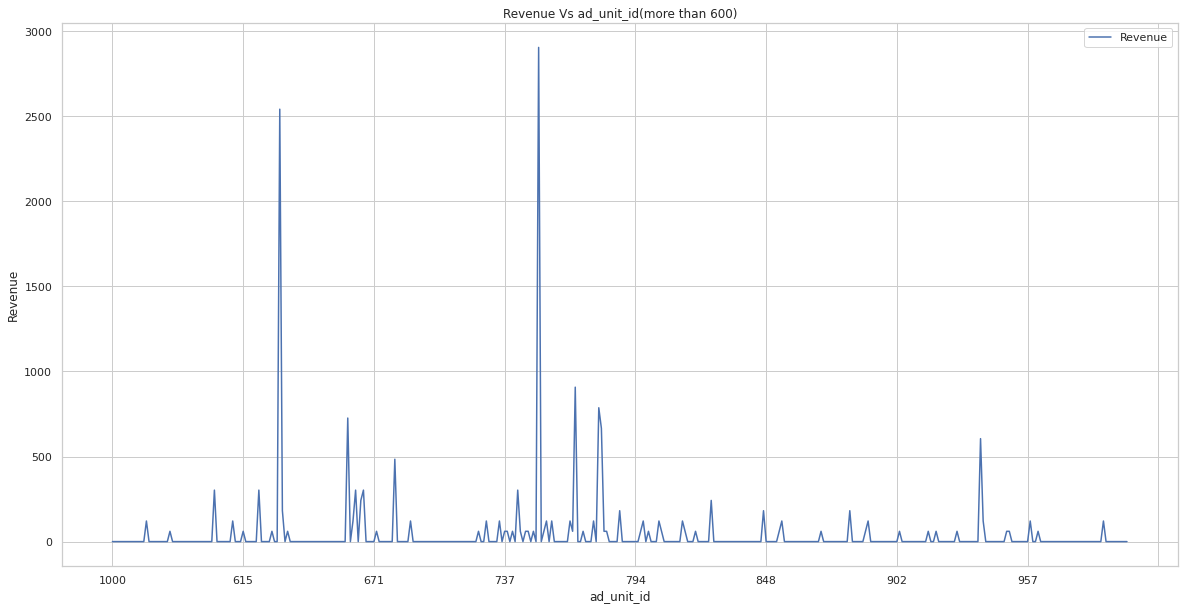

In [ ]:
more_than_600_rev_ad(Mobile_revenue_ad_unit_id)

Now, we can see that ad_unit_id around 620, 670, 737 to 780 has more contribution in the revenue. The company should exclude the use of ad_unit_id which has no any contribution is revenue.

1.2  **When ad_unit_id is less than 600 for Mobile Devices**

<Figure size 432x288 with 0 Axes>

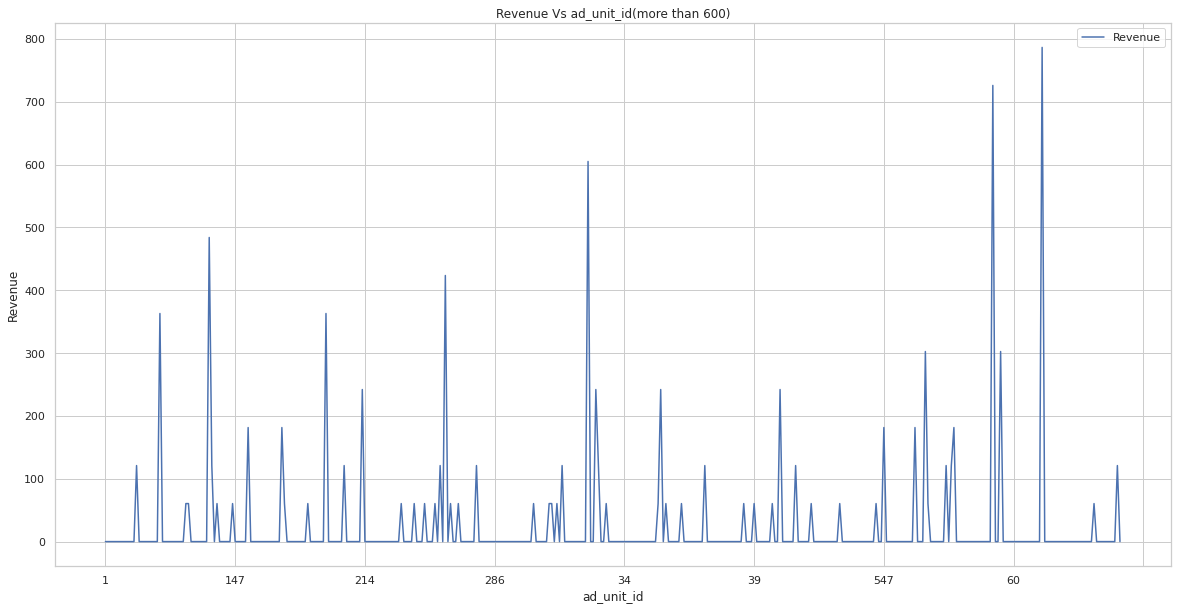

In [ ]:
less_than_600_rev_ad(Mobile_revenue_ad_unit_id)

We can see that ad_unit_id's around 214, 270, 34, 39, 547 have very high contribution in the Revenue of the company. So we can includ those id's excluding others looking at the graph.

2. **Revenue Vs ad_unit_id for Desktop devices**

<Figure size 432x288 with 0 Axes>

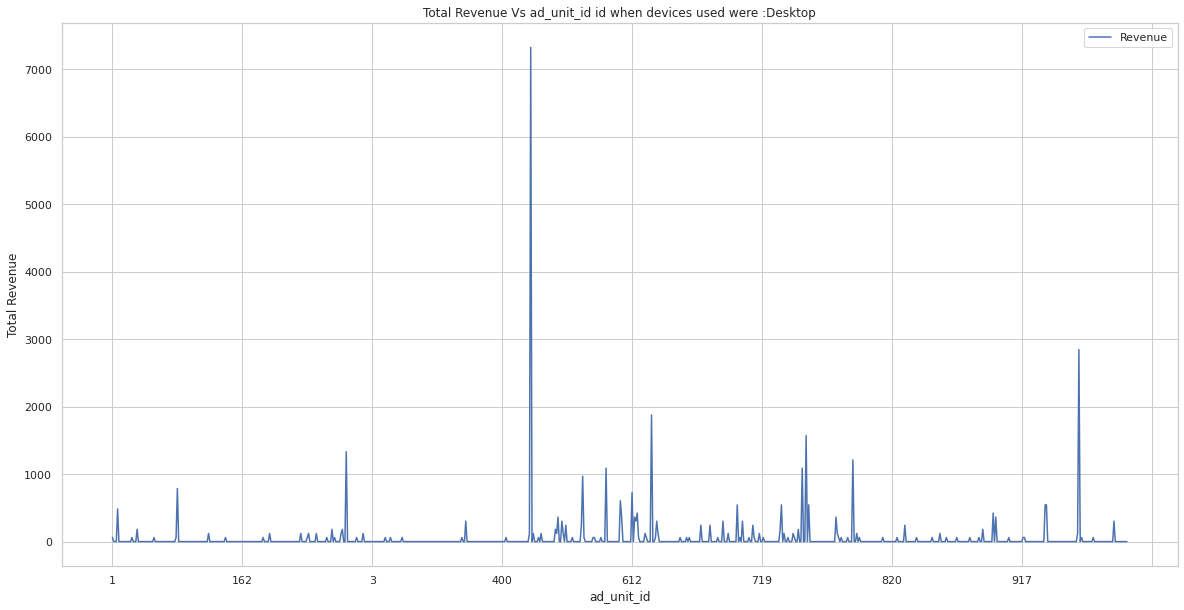

In [ ]:
Desktop_revenue_ad_unit_id = Revenue_ad_unit_id('Desktop')

Let's split the ad_unit_id's into two parts and make the visualization more clear.

_NOTE : The ad_unit_id's can be splitted into more parts or can be viewed in the larger screen for precise conclusions._

2.1 **For ad_unit_id's more than 600.**

<Figure size 432x288 with 0 Axes>

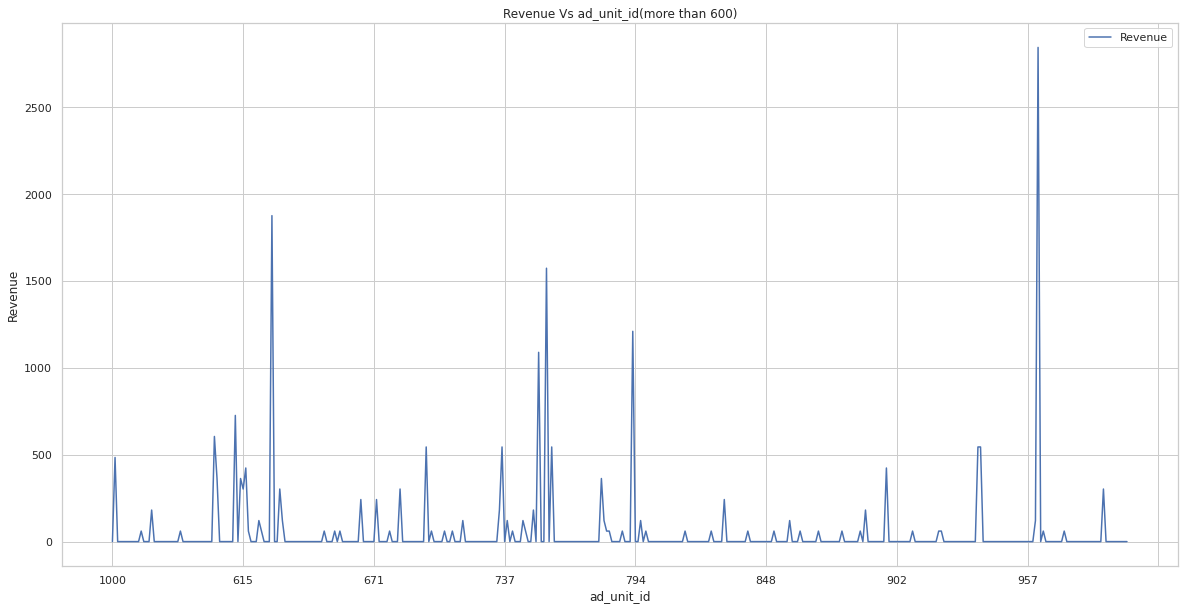

In [ ]:
more_than_600_rev_ad(Desktop_revenue_ad_unit_id)

We can see that the revenue is high  when the ad_unit_id is around 614, 737 and 957 for Desktop devices.

2.2 **When ad_unit_id is less than 600 for Desktop devices.**

<Figure size 432x288 with 0 Axes>

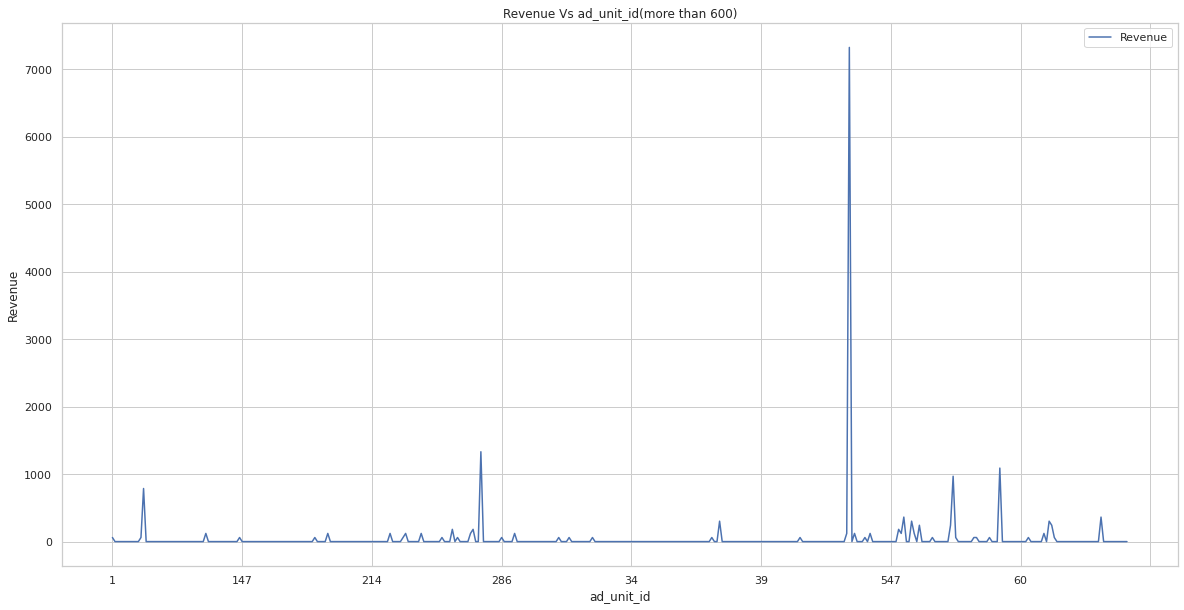

In [ ]:
less_than_600_rev_ad(Desktop_revenue_ad_unit_id)

Ad unit id's around 160, around (214 to 286), 547   is increasing the revenue from Desktop device users. So company should focus on using them more for Desktop devices. I recommend company to avoid the ad_unit_id's which don't havd any contribution in revenue.

## 3. Revenue vs ad_unit_id graph when Tablet devices were used

<Figure size 432x288 with 0 Axes>

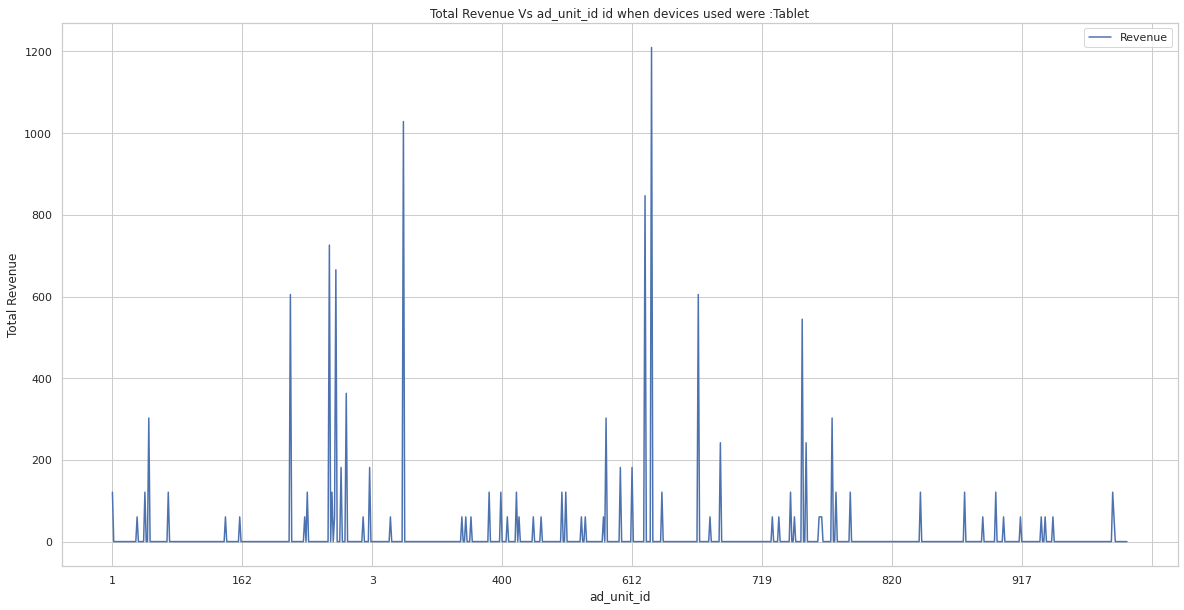

In [ ]:
Tablet_revenue_ad_unit_id = Revenue_ad_unit_id('Tablet')

Let's visualize more clearly splitting the ad_unit_id into two parts.

3.1 **When ad_unit id is more than 600**

<Figure size 432x288 with 0 Axes>

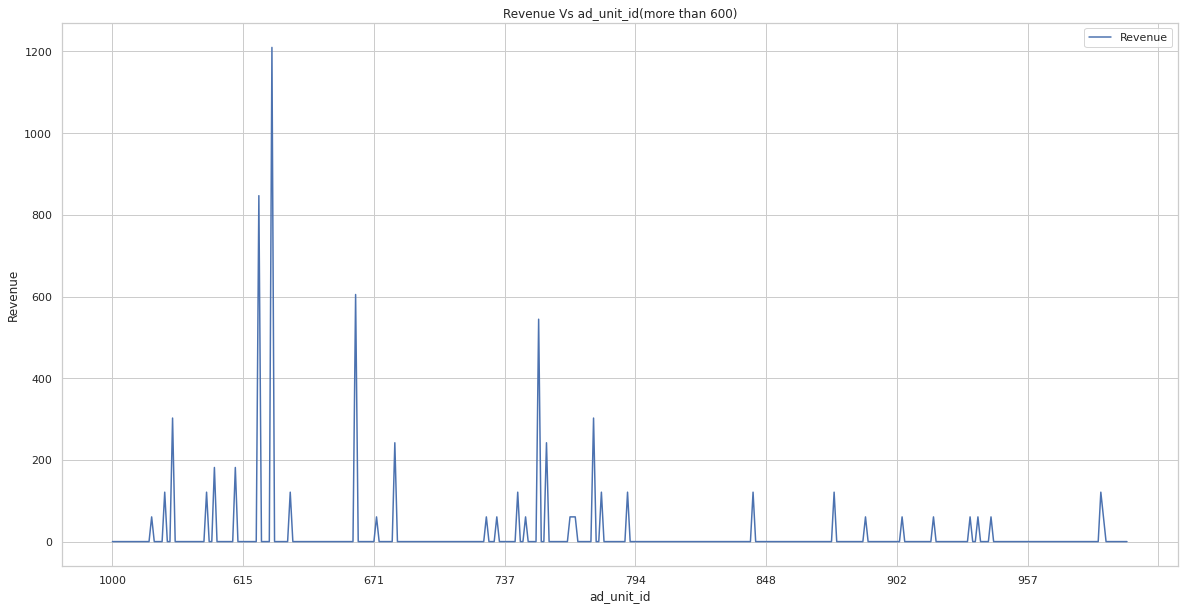

In [ ]:
more_than_600_rev_ad(Tablet_revenue_ad_unit_id)

We can see that ad_unit_id's around 615, 737, 794, 924 is increasing the revenue for from Tablet device users. So, I recommend using those ad_unit_id's and excluding non-contributing ad_unit_id's for tablet devices looking at the above graph.

3.2 **When the ad_unit_id is less than 600.**

<Figure size 432x288 with 0 Axes>

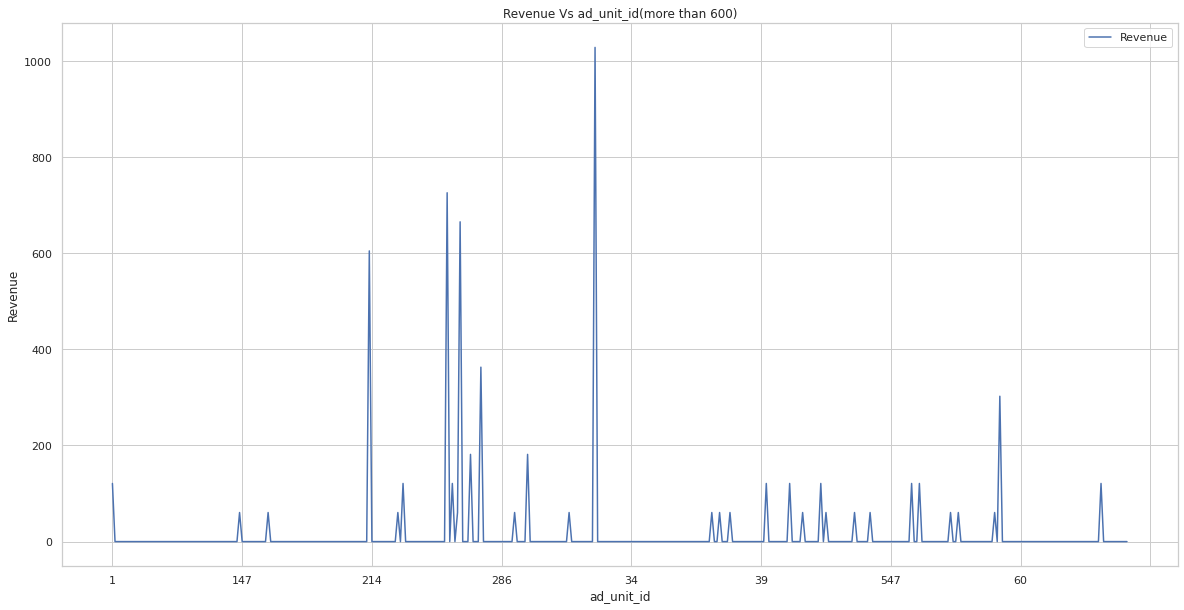

In [ ]:
less_than_600_rev_ad(Tablet_revenue_ad_unit_id)

We can see that ad_unit_id's around 286, 39 is increasing the revenue for from Tablet device users. So, I recommend using those ad_unit_id's and excluding non-contributing ad_unit_id's inferring from above graph.

#Let's plot Revenue Vs creative_id graph corresponding to the Device Type

#Firstly define a function that takes device type as an argument and returns a DataFrame containing necessary information.

In [ ]:
def Rev_vs_creative(device):
  df_creative_Revenue = []
  for creative_id in merged_df['creative_id'].unique():
    rows = merged_df[(merged_df['creative_id'] == creative_id) & (merged_df['device'] == device)]
    c = (rows['RPM'].multiply(rows['impressions']/1000)).sum()
    df_creative_Revenue.append([creative_id,c])
  df_creative_Revenue = pd.DataFrame(df_creative_Revenue, columns=['creative_id', 'Revenue'])
  df_creative_Revenue = df_creative_Revenue.sort_values(by=['creative_id'])
  plt.figure()
  df_creative_Revenue.plot(kind = 'bar', x = 'creative_id', y = 'Revenue', figsize = (20,10),rot = 0,title = 'Total Revenue Vs creative_id id when device used were : '+str(device))
  plt.ylabel('Total Revenue')
  return df_creative_Revenue

1. **Revenue Vs creative_id when device type is Desktop.**




<Figure size 432x288 with 0 Axes>

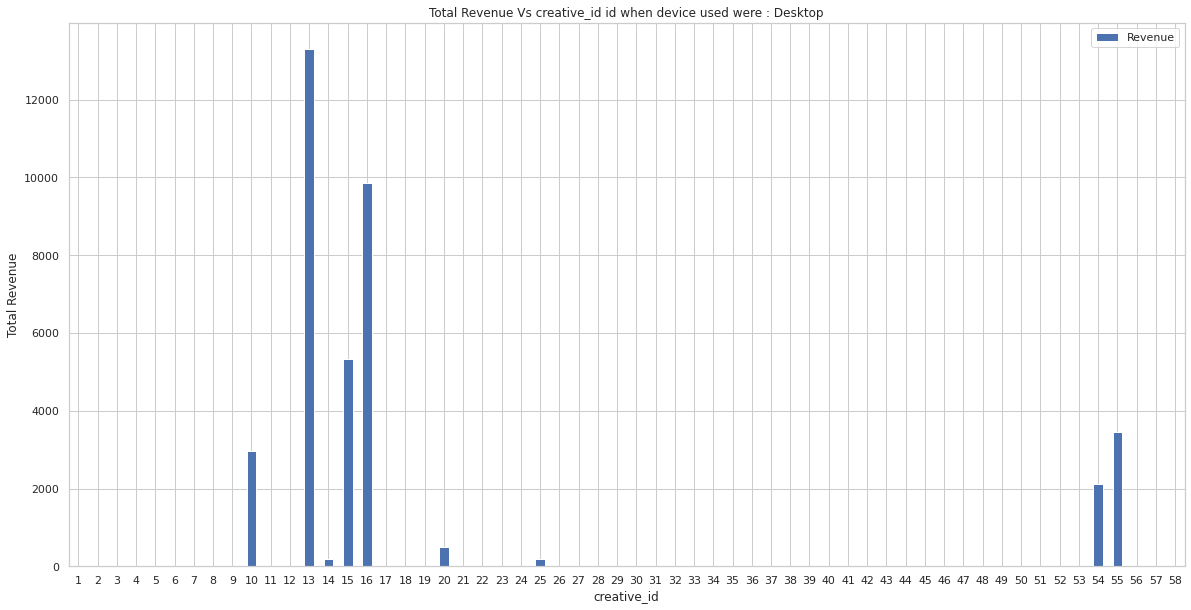

In [ ]:
Desktop_creative = Rev_vs_creative('Desktop')

We can see that for the Desktop device the revenue is high when creative id is 10,13,14,15,16, 20,25,54,55. Company can boost up the revenue using those creative id for Desktop devices. I recommend not to use creative id's which don't have any contribution(optimize and use) or very less contribution in revenue.

2. **Revenue Vs creative_id when device type is Mobile.**


<Figure size 432x288 with 0 Axes>

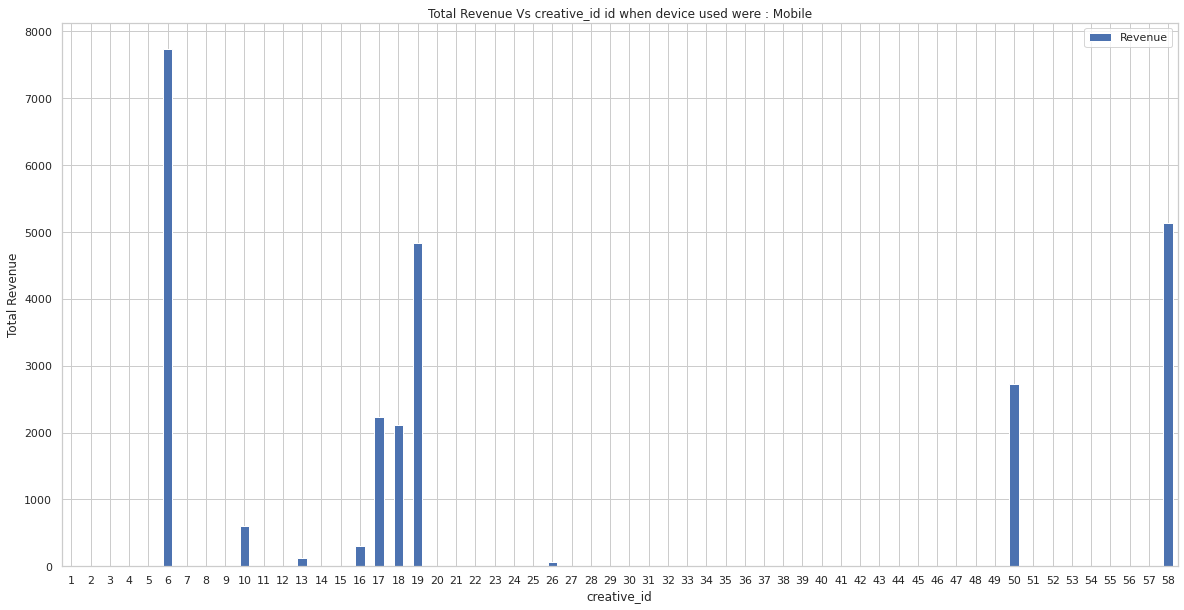

In [ ]:
Mobile_Creative = Rev_vs_creative('Mobile')

From the above graph, for Mobile device, we can see that for creative id 6,10,13,16,17,18 and 19 have most contribution in the revenue of the company. So using those creative id's, in Mobile Devices, can boost up the revenue of the company. I recommend not to use creative id's which don't have any contribution(optimize and use) or very less contribution in revenue.

3. **Revenue Vs creative_id when device type is Tablet.**


<Figure size 432x288 with 0 Axes>

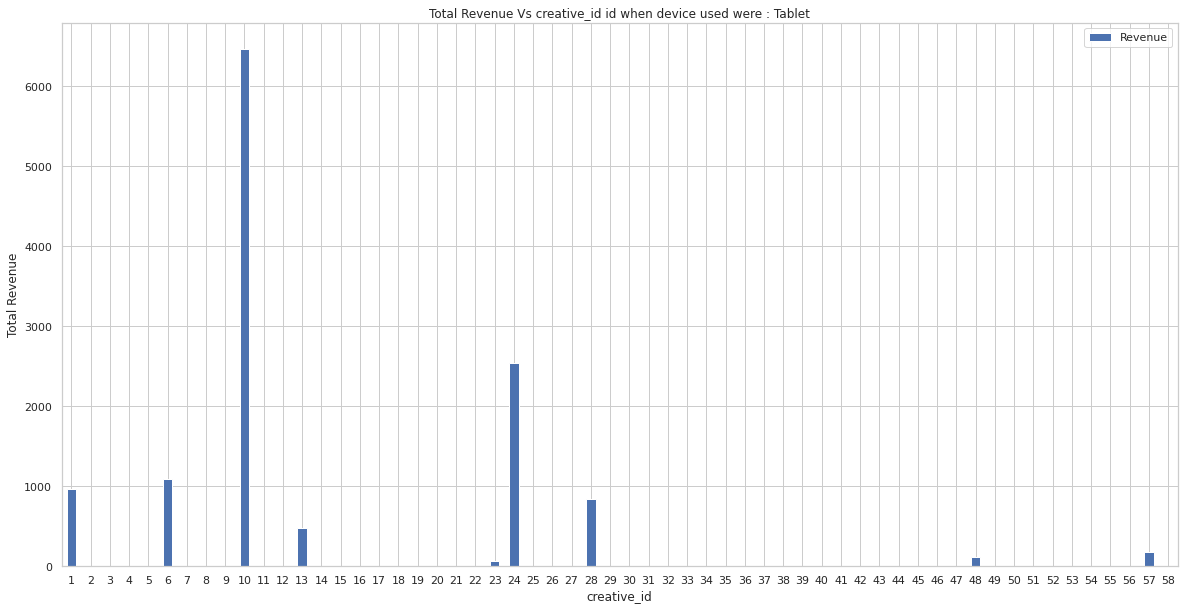

In [ ]:
Tablet_creative = Rev_vs_creative('Tablet')

From the above graph we can see the creative_id 1, 6,10,13,23,24,28, 48,57 has highest contribution in revenue. We can use those creative_id , for Tablet devices ,inorder to boost up the revenue. I recommend not to use creative id's which don't have any contribution(optimize and use) or very less contribution in revenue.

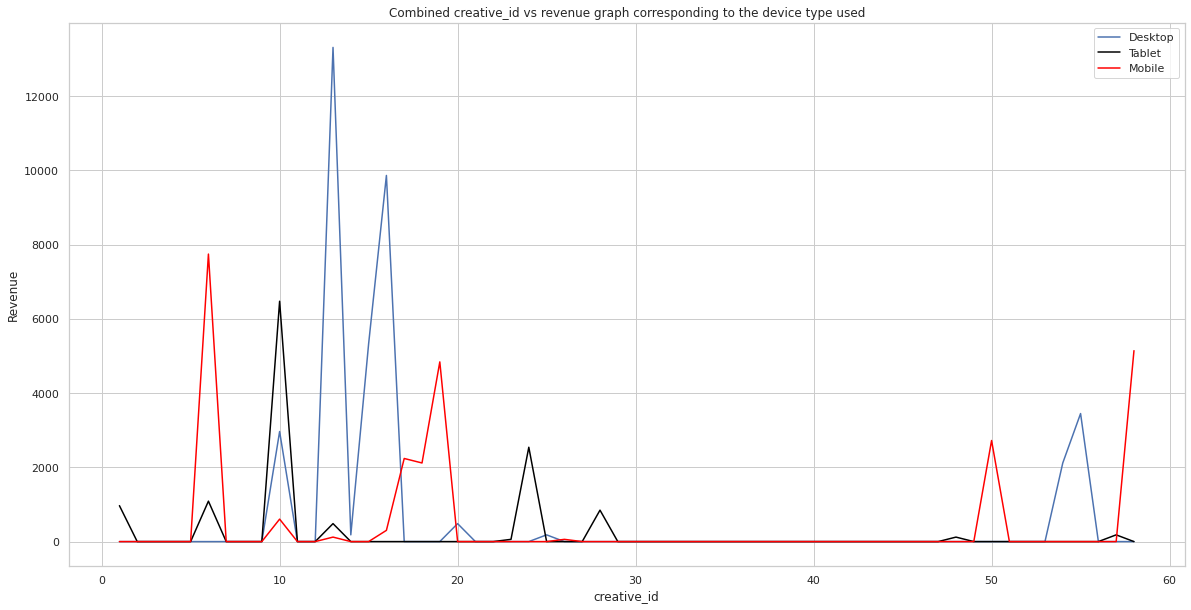

In [ ]:
# Visualization
plt.figure(figsize=(20,10))
plt.plot(Desktop_creative['creative_id'], Desktop_creative['Revenue'] , label = 'Desktop')
plt.plot(Tablet_creative['creative_id'], Tablet_creative['Revenue'] , label = 'Tablet', color ='black')
plt.plot(Mobile_Creative['creative_id'], Mobile_Creative['Revenue'] , label = 'Mobile',color = 'red')
plt.title('Combined creative_id vs revenue graph corresponding to the device type used' )
plt.xlabel('creative_id')
plt.ylabel('Revenue')
plt.legend()